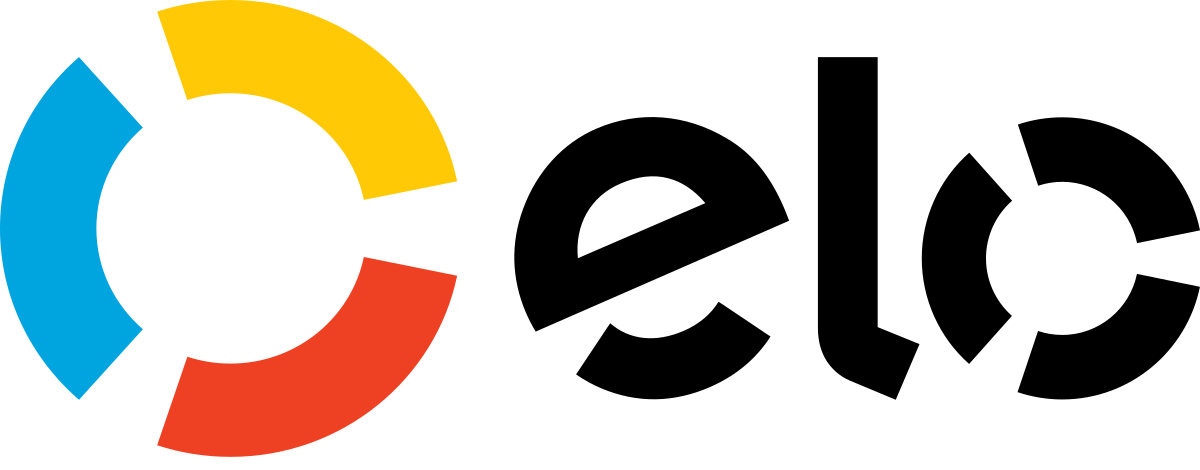

# **import libraries**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
!pip install missingno
!pip install lightgbm

import missingno as msno
from scipy.stats import skew, norm
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


#plt.style.use('dark_background')
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

# **Data Exploration**

### **Loading the data**

In [ ]:
historical_transactions=pd.read_csv('historical_transactions.csv')
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
new_merchant_transactions=pd.read_csv('new_merchant_transactions.csv')
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


### **Concatination**

concatinate historical_transactions, new_merchant_transactions that thy have the same columns

In [ ]:
# Concatenate the historical_transactions and new_merchant_transactions
concatenated_data = pd.concat([historical_transactions, new_merchant_transactions], axis=0)

# Verify the concatenated dataset
concatenated_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
concatenated_data.shape

(31075392, 14)

In [ ]:
concatenated_data

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


## **some analysis for the concatenated data columns and get insights**

### **Authorized_flag**

<Axes: xlabel='authorized_flag'>

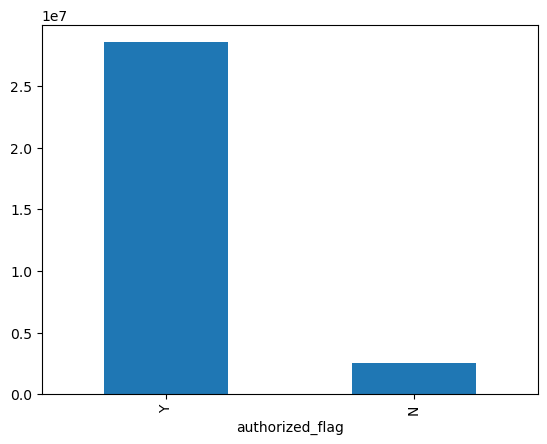

In [ ]:
concatenated_data.authorized_flag.value_counts().plot(kind='bar')

In [ ]:
concatenated_data.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

### **city_id**

In [ ]:
# Get the unique count of city IDs
city_count = concatenated_data['city_id'].nunique()

# Print the count of unique city IDs
print("Number of unique city IDs:", city_count)
concatenated_data['city_id'].value_counts()

Number of unique city IDs: 308


city_id
 69     5164357
-1      2577973
 19     1222038
 158    1197975
 17     1037014
         ...   
 319       1702
 92         783
 273        643
 316        164
 185         50
Name: count, Length: 308, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='city_id'>

Text(0.5, 0, 'City ID')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 10 City IDs by Count')

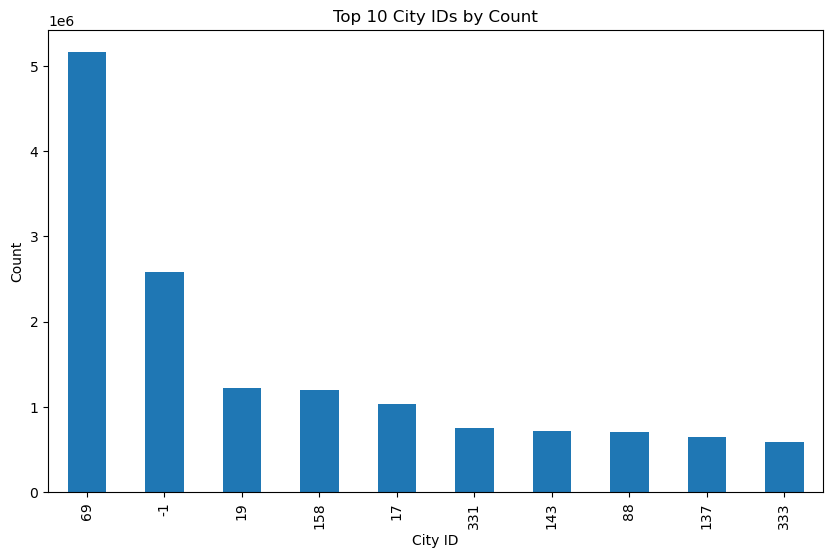

In [ ]:
# Get the value counts of 'city_id'
city_counts = concatenated_data['city_id'].value_counts().head(10)

# Plot the highest 10 counts of 'city_id'
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.xlabel('City ID')
plt.ylabel('Count')
plt.title('Top 10 City IDs by Count')
plt.show()


 **obsevation** : city with '69' as id is the most frequent one in all the transactions 

### **Category 1,2,3**

<BarContainer object of 2 artists>

Text(0.5, 0, 'Category 1')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 1')

([<matplotlib.patches.Wedge at 0x7f9fa1542ac0>,
 [Text(-1.0741870298854514, 0.2369012976449732, 'N'),
  Text(1.0741870298854514, -0.2369012976449733, 'Y')],
 [Text(-0.5859201981193372, 0.12921888962453082, '93.1%'),
  Text(0.5859201981193372, -0.12921888962453087, '6.9%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 1')

<BarContainer object of 5 artists>

Text(0.5, 0, 'Category 2')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 2')

([<matplotlib.patches.Wedge at 0x7f9fa13f8f40>,
 [Text(-0.25165254735426446, 1.070827248163825, '1.0'),
  Text(-0.6595110630162982, -0.8803664905930441, '3.0'),
  Text(0.28862526300388075, -1.061459117232473, '5.0'),
  Text(0.9362005221035992, -0.57751933509879, '4.0'),
  Text(1.0919308781616484, -0.13299232051938747, '2.0')],
 [Text(-0.13726502582959876, 0.5840875899075408, '57.3%'),
  Text(-0.359733307099799, -0.48019990395984213, '14.8%'),
  Text(0.1574319616384804, -0.5789777003086216, '14.1%'),
  Text(0.5106548302383267, -0.31501054641752185, '9.9%'),
  Text(0.5955986608154445, -0.07254126573784771, '3.9%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 2')

<BarContainer object of 3 artists>

Text(0.5, 0, 'Category 3')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 3')

([<matplotlib.patches.Wedge at 0x7f9f59894fa0>,
 [Text(-0.10219138144272849, 1.095242859624671, 'A'),
  Text(-0.12080067914717242, -1.0933467866681559, 'B'),
  Text(1.0773959415850642, -0.22185126787114132, 'C')],
 [Text(-0.055740753514215535, 0.5974051961589114, '53.0%'),
  Text(-0.06589127953482131, -0.5963709745462668, '40.6%'),
  Text(0.5876705135918532, -0.12100978247516797, '6.5%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 3')

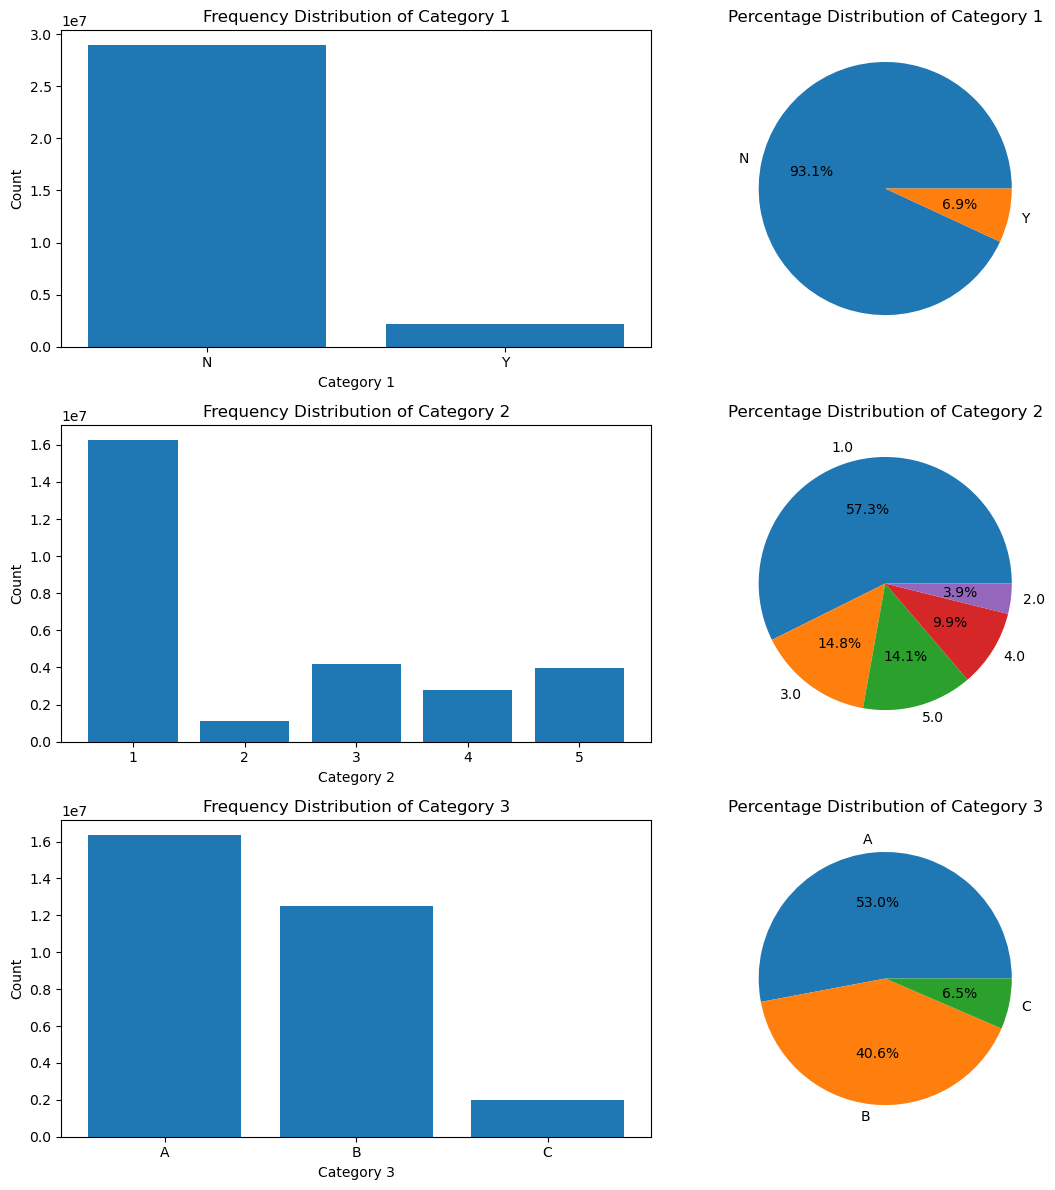

In [ ]:
# Frequency distribution of 'category_1'
category1_counts = concatenated_data['category_1'].value_counts()
category1_percentages = concatenated_data['category_1'].value_counts(normalize=True) * 100

# Frequency distribution of 'category_2'
category2_counts = concatenated_data['category_2'].value_counts()
category2_percentages = concatenated_data['category_2'].value_counts(normalize=True) * 100

# Frequency distribution of 'category_3'
category3_counts = concatenated_data['category_3'].value_counts()
category3_percentages = concatenated_data['category_3'].value_counts(normalize=True) * 100

# Plot the frequency distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Category 1
axes[0, 0].bar(category1_counts.index, category1_counts.values)
axes[0, 0].set_xlabel('Category 1')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Frequency Distribution of Category 1')

axes[0, 1].pie(category1_percentages, labels=category1_percentages.index, autopct='%1.1f%%')
axes[0, 1].set_title('Percentage Distribution of Category 1')

# Category 2
axes[1, 0].bar(category2_counts.index, category2_counts.values)
axes[1, 0].set_xlabel('Category 2')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Frequency Distribution of Category 2')

axes[1, 1].pie(category2_percentages, labels=category2_percentages.index, autopct='%1.1f%%')
axes[1, 1].set_title('Percentage Distribution of Category 2')

# Category 3
axes[2, 0].bar(category3_counts.index, category3_counts.values)
axes[2, 0].set_xlabel('Category 3')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Frequency Distribution of Category 3')

axes[2, 1].pie(category3_percentages, labels=category3_percentages.index, autopct='%1.1f%%')
axes[2, 1].set_title('Percentage Distribution of Category 3')

plt.tight_layout()
plt.show()


### **installments**

<Axes: title={'center': 'Bar Plot for Installenents'}, xlabel='months', ylabel='data points'>

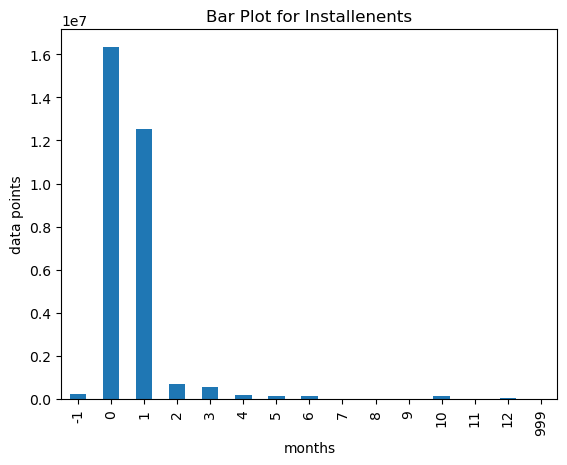

In [ ]:
x=sorted(concatenated_data.installments.value_counts().index) 
y= concatenated_data.installments.value_counts() 
y[x].plot(kind="bar", xlabel="months",ylabel="data points", title="Bar Plot for Installenents")

**Observation:**
 Installments should be between 0–12 months, however we can see month value of -1 and 999 which may be some error or wrong entries.

In [ ]:
#drop row with wrong values
concatenated_data = concatenated_data.drop(concatenated_data[(concatenated_data['installments'] == -1) | (concatenated_data['installments'] == 999)].index)


<Axes: title={'center': 'Bar Plot for Installements'}, xlabel='months', ylabel='data points'>

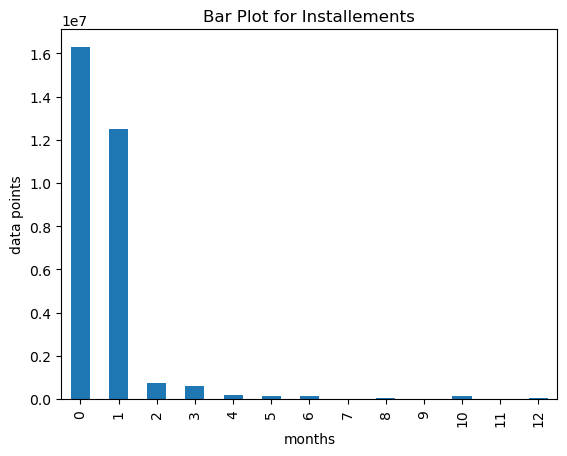

In [ ]:
x=sorted(concatenated_data.installments.value_counts().index) 
y= concatenated_data.installments.value_counts() 
y[x].plot(kind="bar", xlabel="months",ylabel="data points", title="Bar Plot for Installements")

###**Dealing with dates**

In [ ]:
#https://github.com/Rjt5412/Elo-Merchant-Category-Recommendation

# Get the day of the week for the purchase date
def get_weekday(data):
  return data.dt.dayofweek

# Return 1 if the purchase date is on a weekend
def is_weekend(day):
  if  day == 5 or day == 6:
    return 1
  else:
    return 0

#Return month of purchase date
def get_purchase_month(data):
  return data.dt.month_name()

#Return the month phase during the purchase
#Eg. Early in the month, mid-month or at the end of the month
def get_time_of_month(date):
  if date.day <=10:
    return "Early"
  elif date.day > 10 and date.day <= 20:
    return "Mid"
  else:
    return "End"
  

# Returns 1 if the purchase was made on a holiday(Saturdays and sundays excluded)
# Google Search : list of holidays in brazil 2017 and 2018
def get_isholiday(date):
  holiday_list=[
            '01-01-17', '14-02-17', '28-08-17', '14-04-17', '16-04-17', '21-04-17',
            '01-05-17', '15-06-17', '07-09-17', '12-10-17', '02-11-17', '15-11-17', 
            '24-12-17', '25-12-17', '31-12-17',
            '01-01-18', '14-02-18', '28-08-18', '14-04-18', '16-04-18', '21-04-18',
            '01-05-18', '15-06-18', '07-09-18', '12-10-18', '02-11-18', '15-11-18', 
            '24-12-18', '25-12-18', '31-12-18'
  ]
  date = date.strftime(format='%d-%m-%y') 
  if date in holiday_list:
    return 1
  else:
    return 0
     


In [ ]:
# Convert 'purchase_date' and 'first_active_month' to datetime format
date_time_data = pd.to_datetime(concatenated_data['purchase_date'], format='%Y-%m-%d %H:%M:%S')
concatenated_data['purchase_date'] = date_time_data.dt.date

In [ ]:
concatenated_data['purchase_date'].head()

0    2017-06-25
1    2017-07-15
2    2017-08-09
3    2017-09-02
4    2017-03-10
Name: purchase_date, dtype: object

In [ ]:
concatenated_data['weekday'] = get_weekday(date_time_data)
concatenated_data['is_weekend'] = concatenated_data['weekday'].apply(lambda day: is_weekend(day))
concatenated_data['purchase_month'] = get_purchase_month(date_time_data)
concatenated_data['purchase_month_time'] = date_time_data.apply(lambda date: get_time_of_month(date))
concatenated_data['purchase_on_holiday'] = date_time_data.apply(lambda date_obj: get_isholiday(date_obj))

<Figure size 800x600 with 0 Axes>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Weekdays')

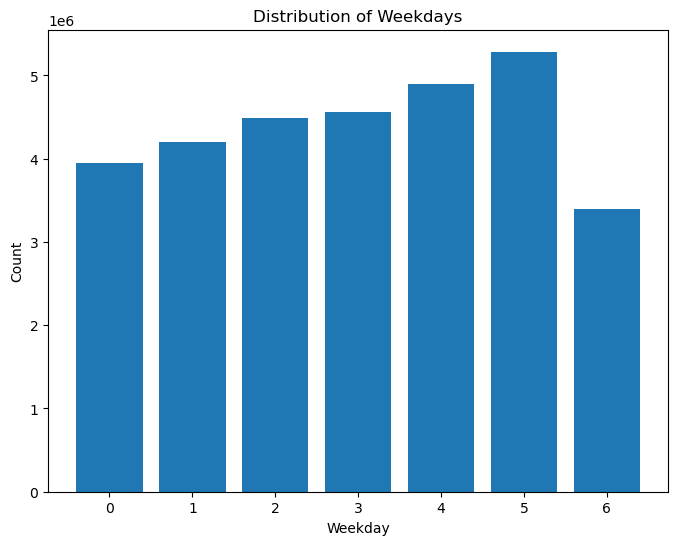

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f9c87bd36a0>,
 [Text(-0.6959239950478575, 0.8518742824599354, '0'),
  Text(0.6959240748060808, -0.8518742173028249, '1')],
 [Text(-0.3795949063897404, 0.46465869952360106, '71.8%'),
  Text(0.3795949498942259, -0.464658663983359, '28.2%')])

Text(0.5, 1.0, 'Distribution of Weekends')

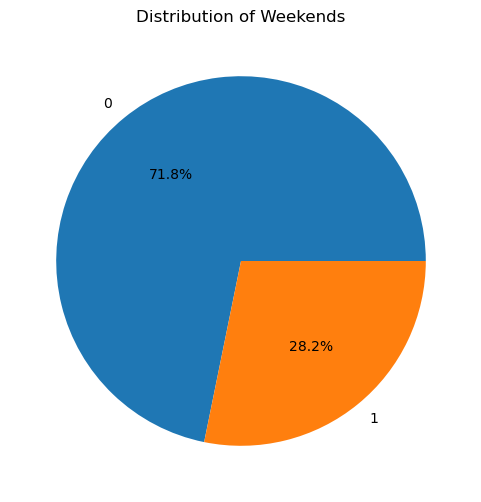

<Figure size 1500x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Purchase Months')

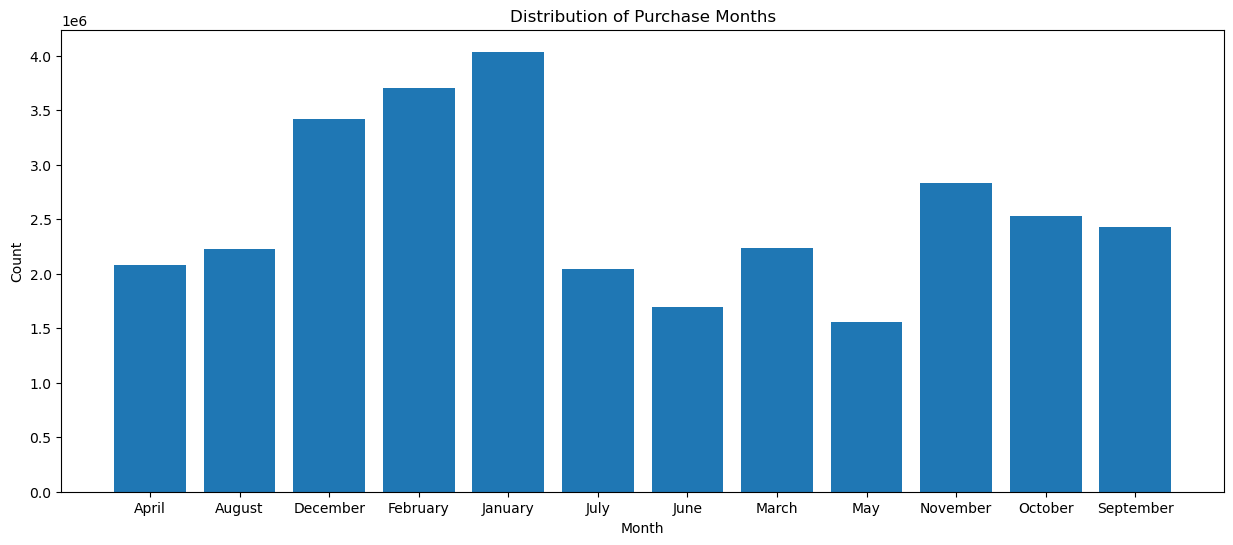

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Time of Month')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Purchase Times of Month')

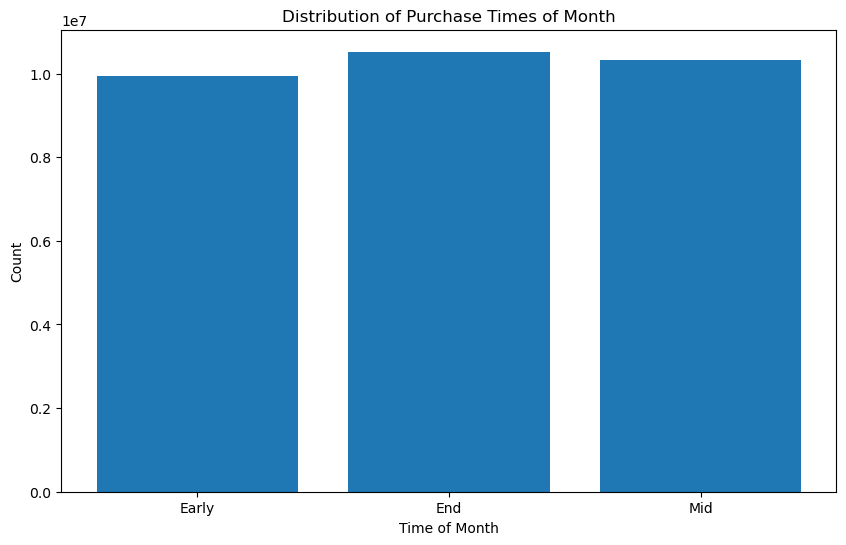

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f9c87aec850>,
 [Text(-1.093922031296573, 0.11547549282847783, '0'),
  Text(1.0939220380538186, -0.11547542881574524, '1')],
 [Text(-0.5966847443435852, 0.06298663245189699, '96.7%'),
  Text(0.5966847480293554, -0.06298659753586104, '3.3%')])

Text(0.5, 1.0, 'Distribution of Purchases on Holidays')

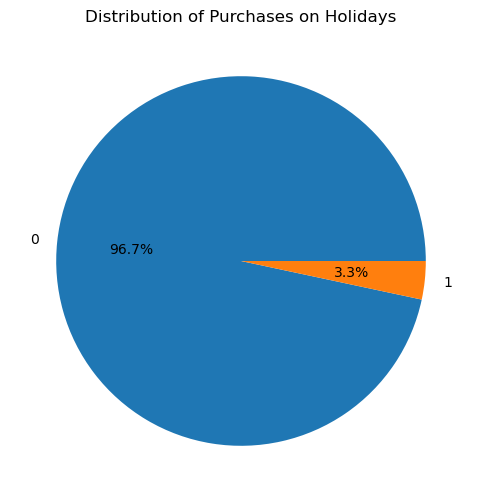

In [ ]:
# Plot the distribution of weekdays
weekday_counts = concatenated_data['weekday'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Distribution of Weekdays')
plt.show()

# Plot the distribution of weekends
is_weekend_counts = concatenated_data['is_weekend'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(is_weekend_counts, labels=is_weekend_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Weekends')
plt.show()

# Plot the distribution of purchase months
purchase_month_counts = concatenated_data['purchase_month'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
plt.bar(purchase_month_counts.index, purchase_month_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Purchase Months')
plt.show()


# Plot the distribution of purchase times of month
purchase_month_time_counts = concatenated_data['purchase_month_time'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(purchase_month_time_counts.index, purchase_month_time_counts.values)
plt.xlabel('Time of Month')
plt.ylabel('Count')
plt.title('Distribution of Purchase Times of Month')
plt.show()

# Plot the distribution of purchases on holidays
purchase_on_holiday_counts = concatenated_data['purchase_on_holiday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(purchase_on_holiday_counts, labels=purchase_on_holiday_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Purchases on Holidays')
plt.show()


Oservation:

1- Users purchase more on Saturday than any other day

2- there are more purchase on end of the month

3- we found highest number of purchase in February and January month


### **Month_lag**

<Figure size 1000x600 with 0 Axes>

(array([ 687407.,  789990., 1005491.,       0., 1082428., 1231904.,
        1424520.,       0., 1765989., 2045718., 2359483.,       0.,
        2623017., 3062470., 3801191.,       0., 3577282., 3421388.,
         997379.,  903580.]),
 array([-13.  , -12.25, -11.5 , -10.75, -10.  ,  -9.25,  -8.5 ,  -7.75,
         -7.  ,  -6.25,  -5.5 ,  -4.75,  -4.  ,  -3.25,  -2.5 ,  -1.75,
         -1.  ,  -0.25,   0.5 ,   1.25,   2.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Month Lag')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Month Lag')

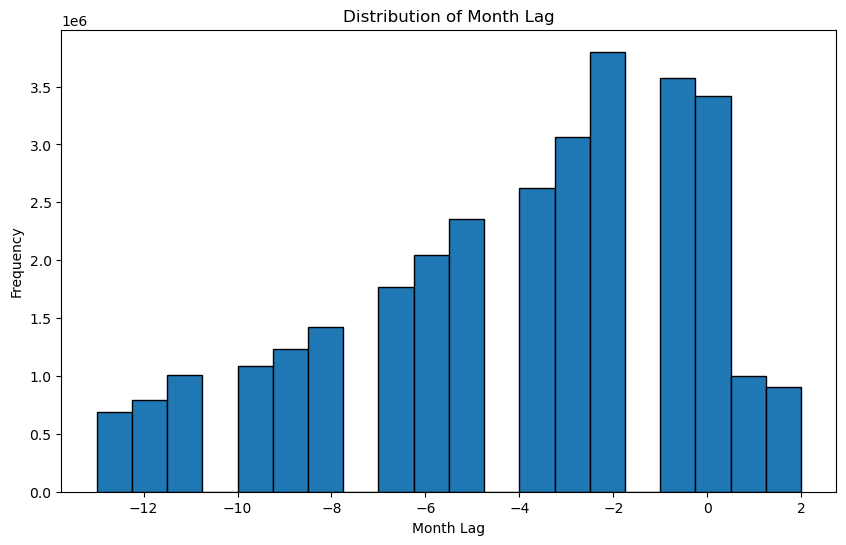

category_1
N   -4.153926
Y   -3.881775
Name: month_lag, dtype: float64


Text(0.5, 0, 'Month Lag')

Text(0, 0.5, 'Purchase Amount')

Text(0.5, 1.0, 'Relationship between Month Lag and Purchase Amount')

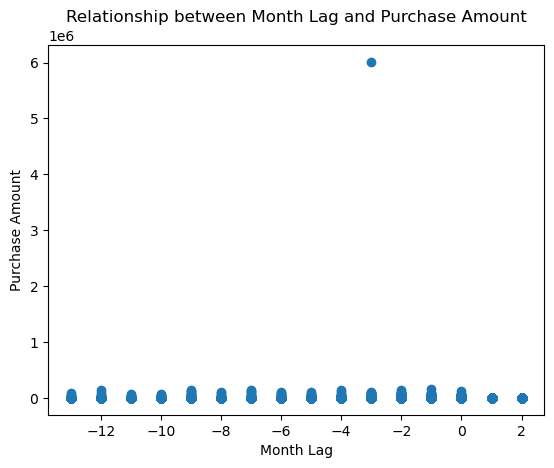

<Axes: xlabel='purchase_date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Month Lag')

Text(0.5, 1.0, 'Average Month Lag Over Time')

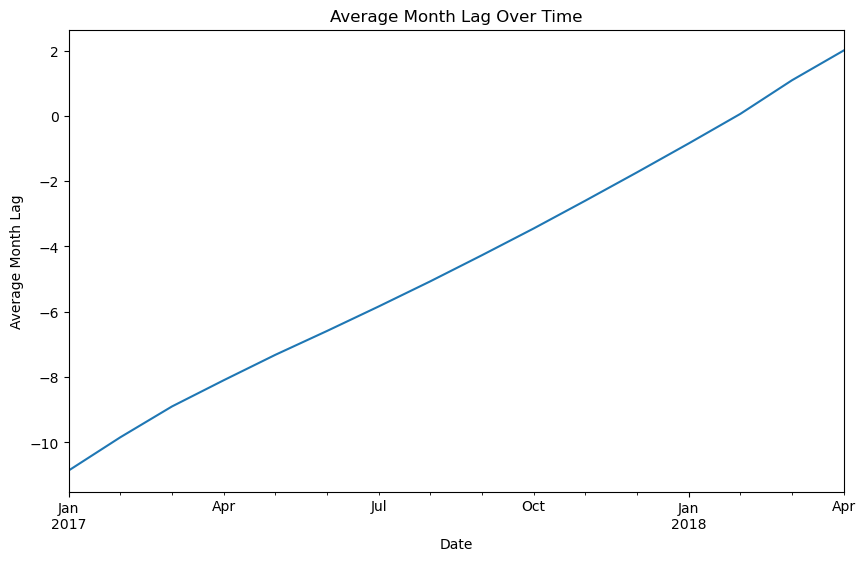

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(concatenated_data['month_lag'], bins=20, edgecolor='k')
plt.xlabel('Month Lag')
plt.ylabel('Frequency')
plt.title('Distribution of Month Lag')
plt.show()

# Group analysis
grouped_data = concatenated_data.groupby('category_1')['month_lag'].mean()
print(grouped_data)

# Relationship with other variables
plt.scatter(concatenated_data['month_lag'], concatenated_data['purchase_amount'])
plt.xlabel('Month Lag')
plt.ylabel('Purchase Amount')
plt.title('Relationship between Month Lag and Purchase Amount')
plt.show()

# Time series analysis
concatenated_data['purchase_date'] = pd.to_datetime(concatenated_data['purchase_date'])
concatenated_data.set_index('purchase_date', inplace=True)
monthly_data = concatenated_data['month_lag'].resample('M').mean()
monthly_data.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average Month Lag')
plt.title('Average Month Lag Over Time')
plt.show()

**Obseration**: most of the month lags are from -2 to -4 

In [ ]:
concatenated_data

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,category_2,state_id,subsector_id,weekday,is_weekend,purchase_month,purchase_month_time,purchase_on_holiday
purchase_date,,,,,,,,,,,,,,,,,,
2017-06-25,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,1.0,16,37,6,1,June,End,0
2017-07-15,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,1.0,16,16,5,1,July,Mid,0
2017-08-09,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,1.0,16,37,2,0,August,Early,0
2017-09-02,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,1.0,16,34,5,1,September,Early,0
2017-03-10,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,1.0,16,37,4,0,March,Early,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-06,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,3.0,19,21,4,0,April,Early,0
2018-03-07,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,1.0,15,34,2,0,March,Early,0
2018-03-05,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,1.0,9,37,0,0,March,Early,0


### **drop unimportant columns(Data cleaning)**

In [ ]:
# Drop a column
concatenated_data = concatenated_data.drop('state_id',axis=1)
concatenated_data = concatenated_data.drop('subsector_id', axis=1)

In [ ]:
concatenated_data = concatenated_data.drop('merchant_category_id', axis=1)

In [ ]:
concatenated_data = concatenated_data.drop('is_weekend',axis=1)
concatenated_data = concatenated_data.drop('purchase_on_holiday', axis=1)

In [ ]:
concatenated_data = concatenated_data.reset_index()

In [ ]:
concatenated_data = concatenated_data.drop('purchase_date', axis=1)

In [ ]:
concatenated_data = concatenated_data.reset_index().drop('index', axis=1)


In [ ]:
concatenated_data 

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_id,month_lag,purchase_amount,category_2,weekday,purchase_month,purchase_month_time
0,Y,C_ID_4e6213e9bc,88,N,0,A,M_ID_e020e9b302,-8,-0.703331,1.0,6,June,End
1,Y,C_ID_4e6213e9bc,88,N,0,A,M_ID_86ec983688,-7,-0.733128,1.0,5,July,Mid
2,Y,C_ID_4e6213e9bc,88,N,0,A,M_ID_979ed661fc,-6,-0.720386,1.0,2,August,Early
3,Y,C_ID_4e6213e9bc,88,N,0,A,M_ID_e6d5ae8ea6,-5,-0.735352,1.0,5,September,Early
4,Y,C_ID_4e6213e9bc,88,N,0,A,M_ID_e020e9b302,-11,-0.722865,1.0,4,March,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30779232,Y,C_ID_1320dee851,142,N,0,A,M_ID_7754b67f3b,2,-0.701828,3.0,4,April,Early
30779233,Y,C_ID_f112aa3381,158,N,0,A,M_ID_da063195b7,2,-0.694390,1.0,2,March,Early
30779234,Y,C_ID_bd97b86450,69,N,1,B,M_ID_9a9ccb6544,1,-0.621031,1.0,0,March,Early
30779235,Y,C_ID_c0513fd84f,130,N,0,A,M_ID_40c28d596f,1,-0.656749,3.0,4,March,Early


## **userscore file (analysis and data cleaning)**

In [ ]:
userscore=pd.read_csv('userscore.csv')
userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


<Axes: xlabel='feature_1'>

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of Feature 1')

<Axes: xlabel='feature_2'>

Text(0.5, 0, 'Feature 2')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of Feature 2')

<Axes: xlabel='feature_3'>

Text(0.5, 0, 'Feature 3')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of Feature 3')

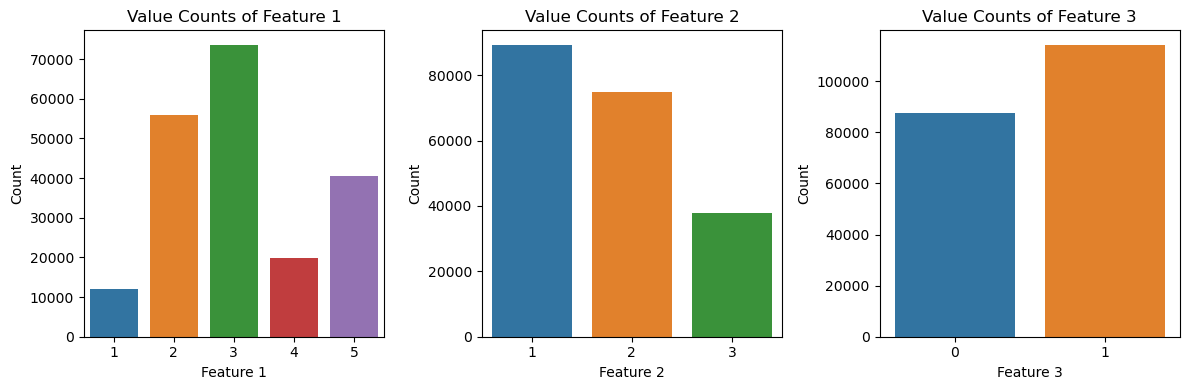

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of feature_1
feature1_counts = userscore['feature_1'].value_counts()

# Get the value counts of feature_2
feature2_counts = userscore['feature_2'].value_counts()

# Get the value counts of feature_3
feature3_counts = userscore['feature_3'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot value counts for feature_1
sns.barplot(x=feature1_counts.index, y=feature1_counts.values, ax=axes[0])
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Count')
axes[0].set_title('Value Counts of Feature 1')

# Plot value counts for feature_2
sns.barplot(x=feature2_counts.index, y=feature2_counts.values, ax=axes[1])
axes[1].set_xlabel('Feature 2')
axes[1].set_ylabel('Count')
axes[1].set_title('Value Counts of Feature 2')

# Plot value counts for feature_3
sns.barplot(x=feature3_counts.index, y=feature3_counts.values, ax=axes[2])
axes[2].set_xlabel('Feature 3')
axes[2].set_ylabel('Count')
axes[2].set_title('Value Counts of Feature 3')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Text(0.5, 0, 'Features')

Text(0, 0.5, 'Target')

Text(0.5, 1.0, 'Scatter Plot: Features vs Target')

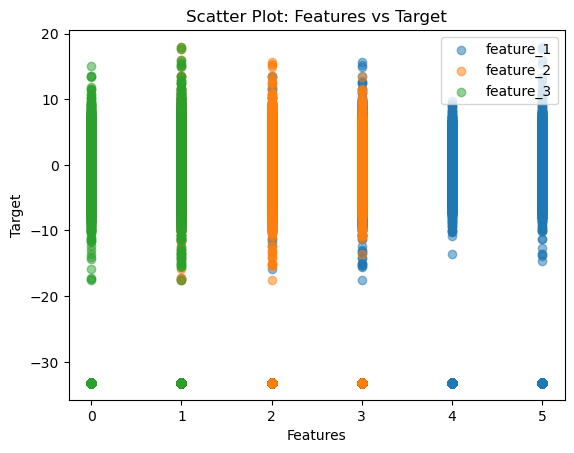

In [ ]:

# Select the relevant columns (features and target)
features = ['feature_1', 'feature_2', 'feature_3']
target = 'score'


# Plot the scatter plot for each feature
for feature in features:
    plt.scatter(userscore[feature], userscore[target], alpha=0.5, label=feature)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Scatter Plot: Features vs Target')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='first_active_month'>

Text(0.5, 0, 'First Active Month')

Text(0, 0.5, 'Average User Score')

Text(0.5, 1.0, 'Average User Score by First Active Month')

(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.]),
 [Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018')])

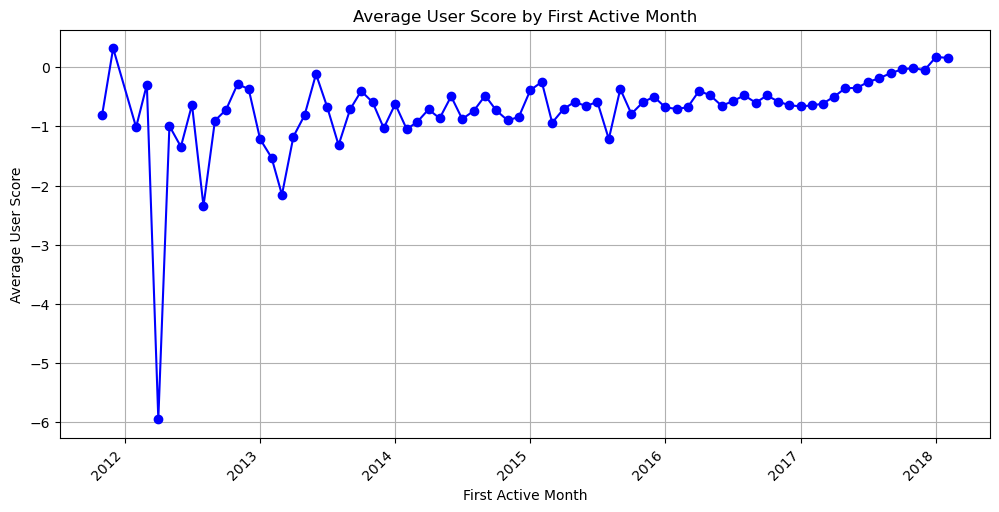

In [ ]:
# Read the train dataset
train_data = pd.read_csv('userscore.csv')

# Extract the necessary columns
userscore_data = userscore[['first_active_month', 'score']].copy()

# Convert 'first_active_month' column to datetime format

userscore_data['first_active_month'] = pd.to_datetime(userscore_data['first_active_month'], format='%b-%y')


# Group data by 'first_active_month' and calculate mean loyalty score
userscore_by_month = userscore_data.groupby('first_active_month')['score'].mean().sort_index()

# Plot loyalty scores by month
plt.figure(figsize=(12, 6))
userscore_by_month.plot(marker='o', color='blue')
plt.xlabel('First Active Month')
plt.ylabel('Average User Score')
plt.title('Average User Score by First Active Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Axes: xlabel='score', ylabel='Density'>

Text(0.5, 1.0, 'Target variable distribution')

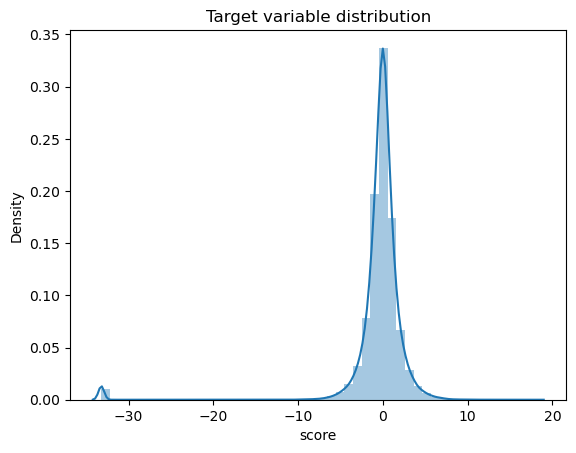

In [ ]:
# the target value distribution 
sns.distplot(userscore['score'])
plt.title('Target variable distribution')
plt.show()

## **Merchants (analysis and data cleaning)**

In [ ]:
merchants=pd.read_csv('merchants.csv')
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


<BarContainer object of 2 artists>

Text(0.5, 0, 'Category 1')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 1')

([<matplotlib.patches.Wedge at 0x7f9c5860e520>,
 [Text(-1.097599922864229, 0.07262512876710678, 'N'),
  Text(1.0975999232892073, -0.07262512234431213, 'Y')],
 [Text(-0.5986908670168521, 0.03961370660024006, '97.9%'),
  Text(0.5986908672486585, -0.039613703096897525, '2.1%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 1')

<BarContainer object of 5 artists>

Text(0.5, 0, 'Category 2')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 2')

([<matplotlib.patches.Wedge at 0x7f9c5861b6a0>,
 [Text(0.005529170394183314, 1.0999861036734748, '1.0'),
  Text(-0.9626940022702797, -0.5321844210354443, '5.0'),
  Text(-0.05034516627066084, -1.0988472888591843, '3.0'),
  Text(0.799679528625823, -0.7553228789708291, '4.0'),
  Text(1.0778379587370897, -0.21969372932667827, '2.0')],
 [Text(0.0030159111240999894, 0.5999924201855317, '49.8%'),
  Text(-0.5251058194201524, -0.2902824114738787, '16.4%'),
  Text(-0.02746099978399682, -0.5993712484686459, '16.1%'),
  Text(0.4361888337959034, -0.41199429762045214, '11.3%'),
  Text(0.5879116138565943, -0.11983294326909723, '6.4%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 2')

<BarContainer object of 2 artists>

Text(0.5, 0, 'Category 4')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency Distribution of Category 4')

([<matplotlib.patches.Wedge at 0x7f9c585e41c0>,
 [Text(-0.6820171985939126, 0.8630484000460877, 'N'),
  Text(0.6820171985939125, -0.8630484000460877, 'Y')],
 [Text(-0.372009381051225, 0.4707536727524114, '71.3%'),
  Text(0.37200938105122494, -0.4707536727524114, '28.7%')])

Text(0.5, 1.0, 'Percentage Distribution of Category 4')

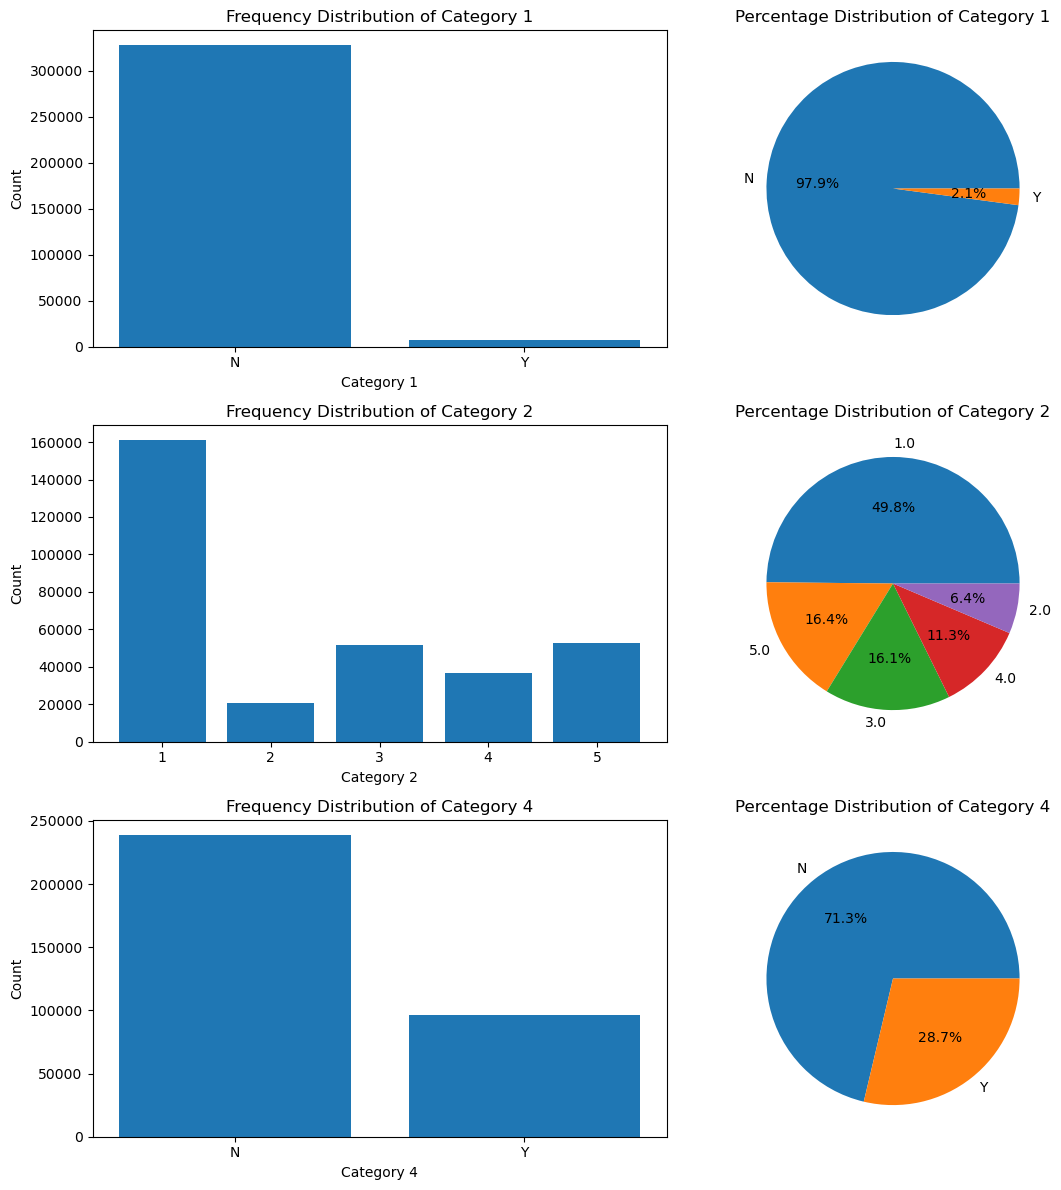

In [ ]:
# Frequency distribution of 'category_1'
category1_counts = merchants['category_1'].value_counts()
category1_percentages = merchants['category_1'].value_counts(normalize=True) * 100

# Frequency distribution of 'category_2'
category2_counts = merchants['category_2'].value_counts()
category2_percentages = merchants['category_2'].value_counts(normalize=True) * 100

# Frequency distribution of 'category_3'
category4_counts = merchants['category_4'].value_counts()
category4_percentages = merchants['category_4'].value_counts(normalize=True) * 100


# Plot the frequency distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Category 1
axes[0, 0].bar(category1_counts.index, category1_counts.values)
axes[0, 0].set_xlabel('Category 1')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Frequency Distribution of Category 1')

axes[0, 1].pie(category1_percentages, labels=category1_percentages.index, autopct='%1.1f%%')
axes[0, 1].set_title('Percentage Distribution of Category 1')

# Category 2
axes[1, 0].bar(category2_counts.index, category2_counts.values)
axes[1, 0].set_xlabel('Category 2')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Frequency Distribution of Category 2')

axes[1, 1].pie(category2_percentages, labels=category2_percentages.index, autopct='%1.1f%%')
axes[1, 1].set_title('Percentage Distribution of Category 2')

# Category 3
axes[2, 0].bar(category4_counts.index, category4_counts.values)
axes[2, 0].set_xlabel('Category 4')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Frequency Distribution of Category 4')

axes[2, 1].pie(category4_percentages, labels=category4_percentages.index, autopct='%1.1f%%')
axes[2, 1].set_title('Percentage Distribution of Category 4')


plt.tight_layout()
plt.show()


In [ ]:
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

### Drop unimportant features (Data cleaning)

In [ ]:
merchants = merchants.drop('subsector_id', axis=1)
merchants = merchants.drop('merchant_group_id', axis=1)
merchants = merchants.drop('merchant_category_id', axis=1)
merchants = merchants.drop('state_id', axis=1)

In [ ]:
merchants

,merchant_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,category_2
0,M_ID_838061e48c,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,1.0
1,M_ID_9339d880ad,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,1.0
2,M_ID_e726bbae1e,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5.0
3,M_ID_a70e9c5f81,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,NaN
4,M_ID_64456c37ce,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,3.174788,-0.047556,N,A,A,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,Y,69,1.0
334692,M_ID_725a60d404,-0.057471,-0.057471,Y,A,A,0.89,0.927684,3,0.78,0.813473,6,0.59,0.606765,12,Y,-1,NaN
334693,M_ID_f2045dd267,-0.057471,-0.057471,N,A,A,0.96,0.982957,3,0.90,0.924769,6,0.74,0.750763,8,Y,160,5.0
334694,M_ID_9139332ccc,-0.057471,-0.057471,Y,A,A,0.94,0.919558,3,0.82,0.783000,6,0.65,0.584000,12,Y,-1,NaN


<Axes: xlabel='most_recent_purchases_range'>

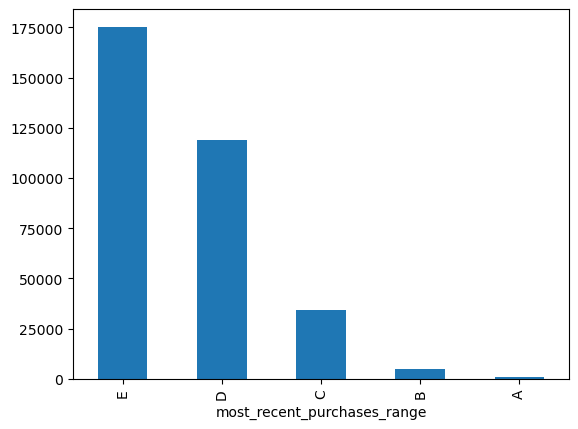

In [ ]:
merchants.most_recent_purchases_range.value_counts().plot(kind="bar")

<Axes: xlabel='most_recent_sales_range'>

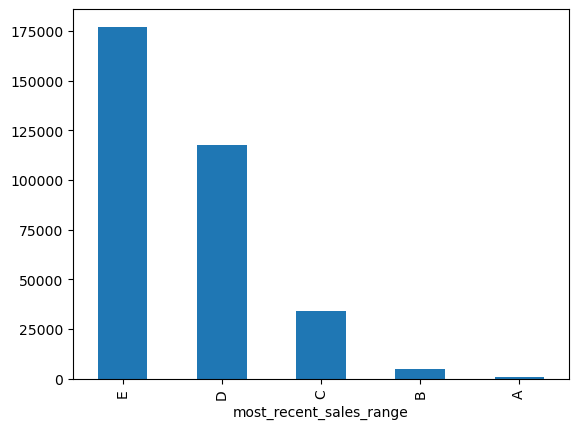

In [ ]:
merchants.most_recent_sales_range.value_counts().plot(kind="bar")

<Axes: xlabel='active_months_lag3'>

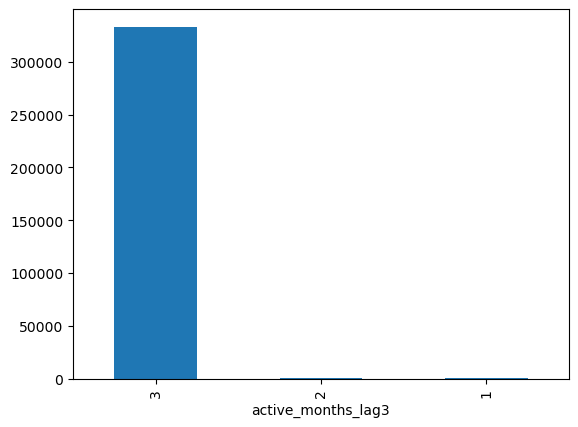

In [ ]:
merchants.active_months_lag3.value_counts().plot(kind="bar")

<Axes: xlabel='active_months_lag6'>

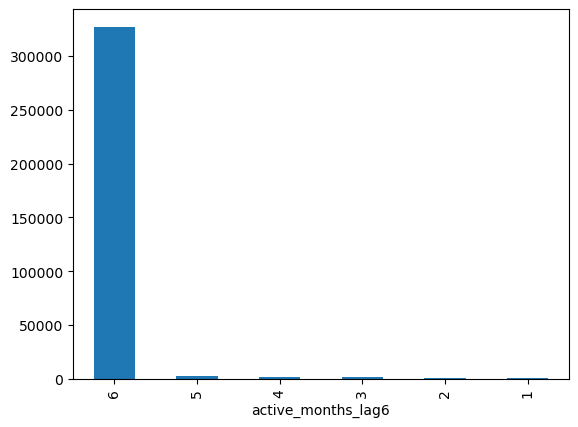

In [ ]:
merchants.active_months_lag6.value_counts().plot(kind="bar")

<Axes: xlabel='active_months_lag12'>

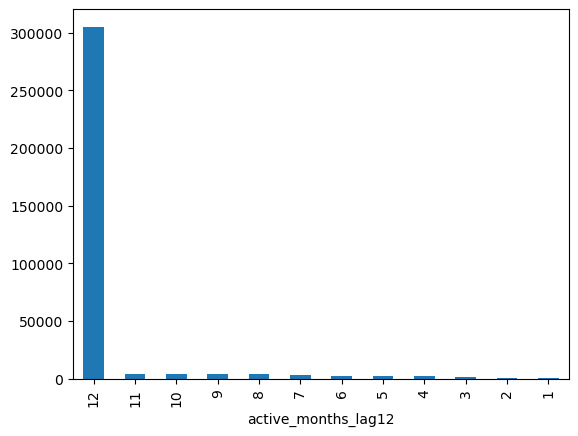

In [ ]:
merchants.active_months_lag12.value_counts().plot(kind="bar")

In [ ]:
#check for duplictes
duplicates = merchants.duplicated()
duplicate_count = duplicates.sum()
print("Number of Duplicate Rows:", duplicate_count)

Number of Duplicate Rows: 22


In [ ]:
#Drop duplicates
merchants.drop_duplicates(inplace=True)

## **Merge our data to  a single dataframe**
**the best usage of the four files.**

In [ ]:
# Join concatenated_data to userscore
df = pd.merge(concatenated_data, userscore, on='card_id')

In [ ]:
df

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_id,month_lag,purchase_amount,category_2,weekday,purchase_month,purchase_month_time,first_active_month,feature_1,feature_2,feature_3,score
0,N,C_ID_5037ff576e,322,N,1,B,M_ID_b61c7d1be0,-3,-0.595260,3.0,3,September,Early,Jan-17,5,1,1,-2.352713
1,Y,C_ID_5037ff576e,138,N,1,B,M_ID_fe69229f24,-4,1.189469,1.0,0,August,Mid,Jan-17,5,1,1,-2.352713
2,Y,C_ID_5037ff576e,226,N,1,B,M_ID_708022307c,-4,-0.652256,1.0,1,August,Mid,Jan-17,5,1,1,-2.352713
3,Y,C_ID_5037ff576e,330,N,1,B,M_ID_393b4b8cec,-9,-0.674210,3.0,6,March,End,Jan-17,5,1,1,-2.352713
4,Y,C_ID_5037ff576e,138,N,1,B,M_ID_fe69229f24,-9,-0.671775,1.0,3,March,Early,Jan-17,5,1,1,-2.352713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19066034,Y,C_ID_5c240d6e3c,3,N,0,A,M_ID_faaf8d042c,2,-0.692001,1.0,3,February,Mid,Oct-17,2,2,0,0.719115
19066035,Y,C_ID_5c240d6e3c,3,N,0,A,M_ID_dc6973f60f,1,-0.476431,1.0,2,January,Mid,Oct-17,2,2,0,0.719115
19066036,Y,C_ID_5c240d6e3c,331,N,0,A,M_ID_c0e83eea18,2,-0.686501,1.0,1,February,Early,Oct-17,2,2,0,0.719115
19066037,Y,C_ID_5c240d6e3c,331,N,0,A,M_ID_a08b92e100,1,-0.691700,1.0,3,January,Early,Oct-17,2,2,0,0.719115


In [ ]:
# Join df to merchants
df= pd.merge(df, merchants, on=['merchant_id','category_1', 'city_id' , 'category_2'])

# Set the option to display all columns
pd.set_option('display.max_columns', None)
df
#,'category_1','merchant_category_id' , 'city_id' , 'category_2' , 'state_id'

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_id,month_lag,purchase_amount,category_2,weekday,purchase_month,purchase_month_time,first_active_month,feature_1,feature_2,feature_3,score,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_5037ff576e,278,N,1,B,M_ID_d70b0fd11b,-6,-0.627477,5.0,2,June,Early,Jan-17,5,1,1,-2.352713,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
1,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-6,-0.547611,5.0,2,August,End,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
2,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-5,-0.186434,5.0,1,September,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
3,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-9,1.354204,5.0,4,May,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
4,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-3,-0.666561,5.0,3,November,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13928438,Y,C_ID_e9aff9026a,212,N,3,C,M_ID_02008f16cc,-4,-0.221130,4.0,0,April,Mid,Jun-16,5,1,1,1.658092,-0.057471,-0.057471,E,E,0.83,0.937500,3,0.79,1.000000,6,0.93,1.244792,12,Y
13928439,Y,C_ID_21cb0e201b,56,N,12,C,M_ID_ee9dce4ab1,-5,1.776044,5.0,4,September,Early,Sep-17,2,3,0,-0.096781,-0.057471,-0.057471,D,E,0.80,0.995781,3,0.48,0.626582,6,0.26,0.327004,12,N
13928440,Y,C_ID_fc220cb7ec,41,N,2,C,M_ID_3c075a6358,-2,0.087064,5.0,1,December,Mid,Aug-17,2,3,0,2.808926,-0.057471,-0.057471,D,E,0.75,1.000000,3,0.44,0.783333,6,0.31,0.658333,12,N
13928441,Y,C_ID_18cf2da215,274,N,0,A,M_ID_8b3366a9de,1,-0.338187,1.0,0,April,Mid,Sep-16,3,2,1,-2.647789,-0.057471,-0.057471,E,E,0.88,1.090909,3,0.88,1.030303,6,1.01,1.166667,12,N


In [ ]:
df

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_id,month_lag,purchase_amount,category_2,weekday,purchase_month,purchase_month_time,first_active_month,feature_1,feature_2,feature_3,score,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_5037ff576e,278,N,1,B,M_ID_d70b0fd11b,-6,-0.627477,5.0,2,June,Early,Jan-17,5,1,1,-2.352713,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
1,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-6,-0.547611,5.0,2,August,End,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
2,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-5,-0.186434,5.0,1,September,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
3,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-9,1.354204,5.0,4,May,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
4,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-3,-0.666561,5.0,3,November,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13928438,Y,C_ID_e9aff9026a,212,N,3,C,M_ID_02008f16cc,-4,-0.221130,4.0,0,April,Mid,Jun-16,5,1,1,1.658092,-0.057471,-0.057471,E,E,0.83,0.937500,3,0.79,1.000000,6,0.93,1.244792,12,Y
13928439,Y,C_ID_21cb0e201b,56,N,12,C,M_ID_ee9dce4ab1,-5,1.776044,5.0,4,September,Early,Sep-17,2,3,0,-0.096781,-0.057471,-0.057471,D,E,0.80,0.995781,3,0.48,0.626582,6,0.26,0.327004,12,N
13928440,Y,C_ID_fc220cb7ec,41,N,2,C,M_ID_3c075a6358,-2,0.087064,5.0,1,December,Mid,Aug-17,2,3,0,2.808926,-0.057471,-0.057471,D,E,0.75,1.000000,3,0.44,0.783333,6,0.31,0.658333,12,N
13928441,Y,C_ID_18cf2da215,274,N,0,A,M_ID_8b3366a9de,1,-0.338187,1.0,0,April,Mid,Sep-16,3,2,1,-2.647789,-0.057471,-0.057471,E,E,0.88,1.090909,3,0.88,1.030303,6,1.01,1.166667,12,N


In [ ]:
df.describe()

,city_id,installments,month_lag,purchase_amount,category_2,weekday,feature_1,feature_2,feature_3,score,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,1.392844e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.236027e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.392844e+07,1.392262e+07,1.392844e+07,1.392844e+07,1.392262e+07,1.392844e+07,1.392844e+07,1.392262e+07,1.392844e+07,1.392844e+07
mean,1.201482e+02,6.969344e-01,-4.195676e+00,2.257290e-01,2.173300e+00,3.015570e+00,3.104236e+00,1.729995e+00,5.399788e-01,-4.750994e-01,4.358770e+00,4.216188e+00,1.759005e+02,inf,2.999681e+00,1.629462e+02,inf,5.997227e+00,1.489571e+02,inf,1.192436e+01
std,9.668996e+01,1.242170e+00,3.775660e+00,1.617197e+03,1.518946e+00,1.918548e+00,1.272140e+00,7.152845e-01,4.983992e-01,3.656366e+00,2.033473e+01,2.001255e+01,1.216637e+04,NaN,2.271170e-02,1.125427e+04,NaN,9.078099e-02,1.057110e+04,NaN,5.664369e-01
min,-1.000000e+00,0.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01,-5.747065e-02,-5.747065e-02,-7.200000e-01,3.334953e-01,1.000000e+00,-2.250000e+00,1.670447e-01,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00
25%,4.800000e+01,0.000000e+00,-7.000000e+00,-7.211974e-01,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,-8.089980e-01,-5.747065e-02,-5.747065e-02,9.600000e-01,9.808700e-01,3.000000e+00,9.400000e-01,9.650989e-01,6.000000e+00,9.400000e-01,9.648064e-01,1.200000e+01
50%,8.800000e+01,0.000000e+00,-3.000000e+00,-6.898221e-01,1.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,-9.055184e-02,-3.764084e-02,-5.747065e-02,1.010000e+00,1.023550e+00,3.000000e+00,1.020000e+00,1.031022e+00,6.000000e+00,1.040000e+00,1.049303e+00,1.200000e+01
75%,1.860000e+02,1.000000e+00,-1.000000e+00,-6.063198e-01,3.000000e+00,5.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,5.375792e-01,2.697212e-01,3.176349e-02,1.080000e+00,1.088951e+00,3.000000e+00,1.120000e+00,1.116544e+00,6.000000e+00,1.160000e+00,1.154162e+00,1.200000e+01
max,3.470000e+02,1.200000e+01,2.000000e+00,6.010604e+06,5.000000e+00,6.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,1.796507e+01,1.727197e+02,1.707367e+02,8.518446e+05,inf,3.000000e+00,1.513959e+06,inf,6.000000e+00,2.567408e+06,inf,1.200000e+01


### **Discuss the quality of the dataset**

In [ ]:
# Number of features with missing values
missing_values_count = df.isnull().sum()
x = 0
for count in missing_values_count:
    if count > 0:
        x += 1
print("Number of features with missing values:", x)

Number of features with missing values: 4


In [ ]:
print("Features with missing values:\n\n")
for feature, count in missing_values_count.items():
    if count > 0:
        missing_percentage = (count / len(df)) * 100
        print(f"{feature}: {count} , Missing percentage: {missing_percentage:.2f}%")

Features with missing values:


category_2: 1568172 , Missing percentage: 11.26%
avg_sales_lag3: 5828 , Missing percentage: 0.04%
avg_sales_lag6: 5828 , Missing percentage: 0.04%
avg_sales_lag12: 5828 , Missing percentage: 0.04%


In [ ]:
missing=df[['category_2','avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']]

<Axes: >

Text(0.5, 1.0, 'Missing Values Pattern')

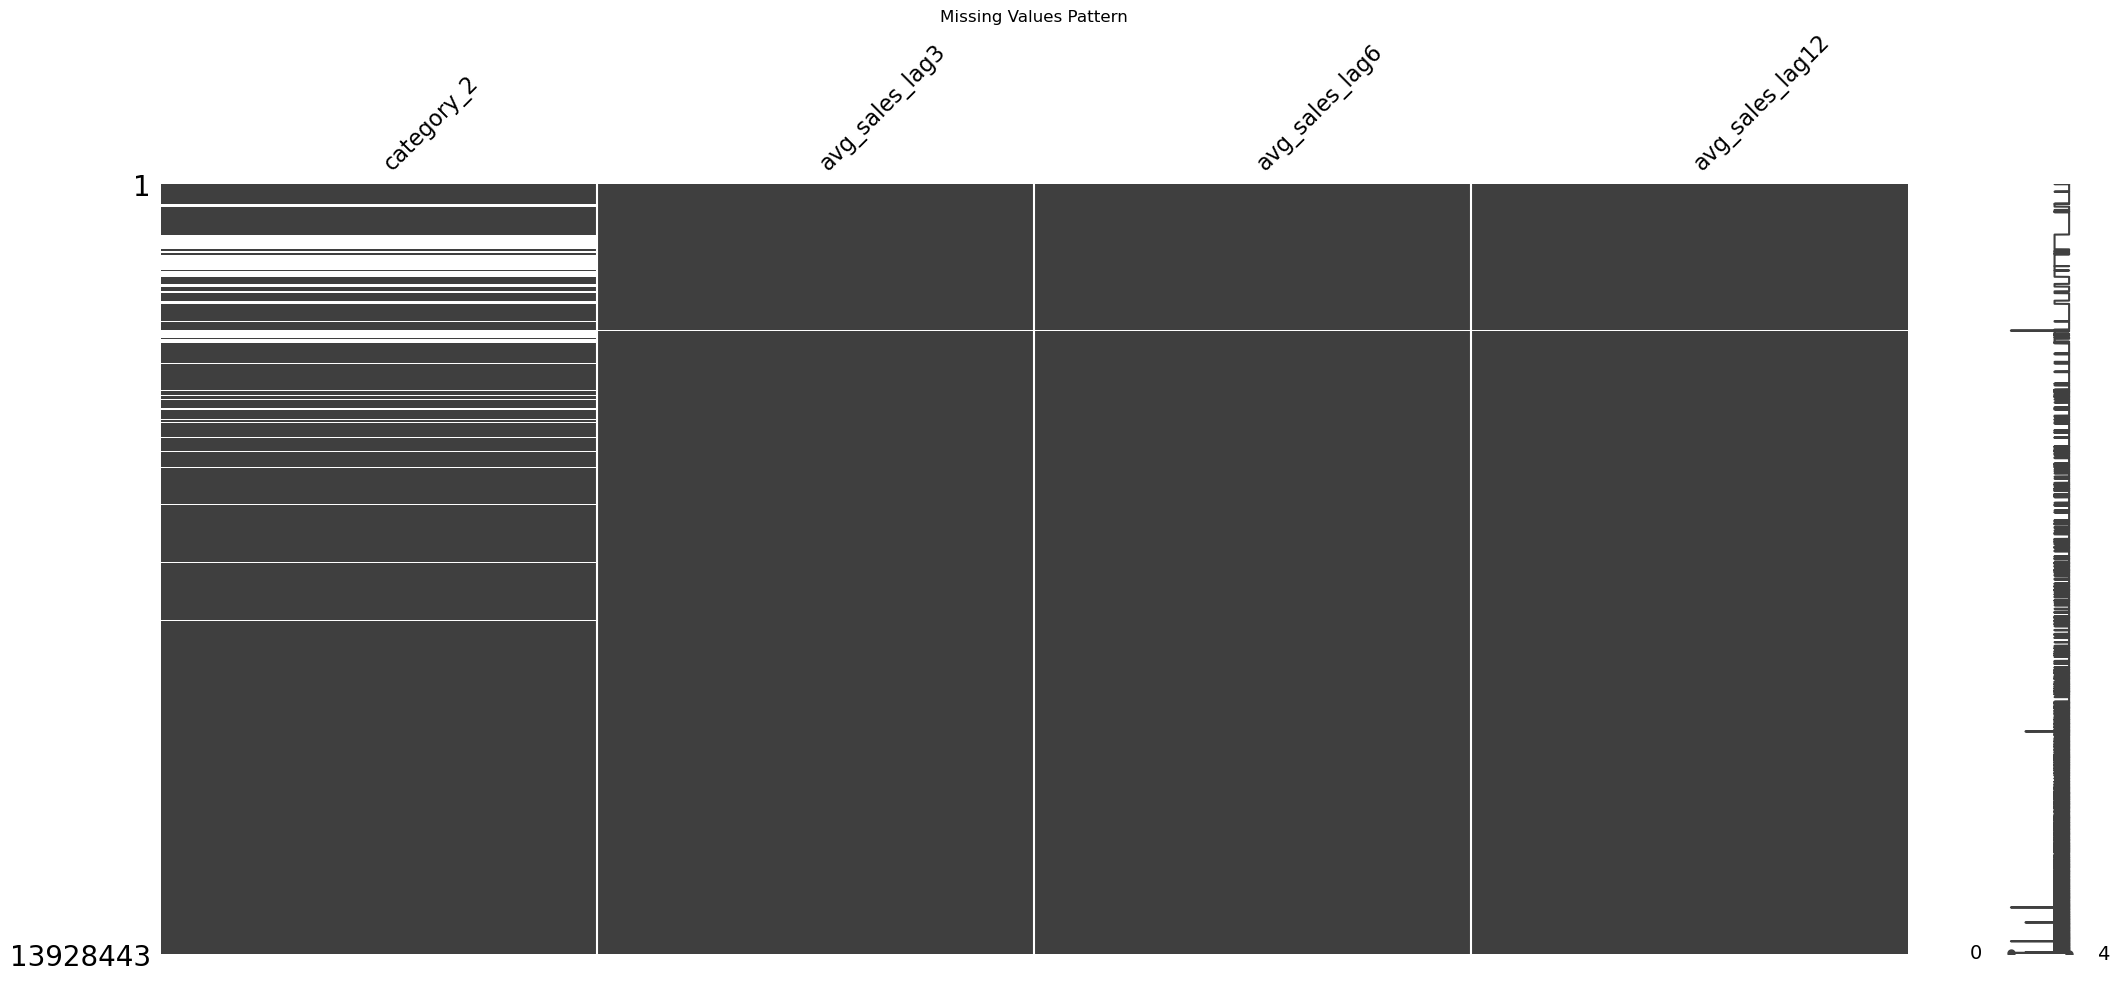

In [ ]:
# Visualize missing values pattern
msno.matrix(missing)
plt.title('Missing Values Pattern')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values Pattern')

<Figure size 1000x600 with 0 Axes>

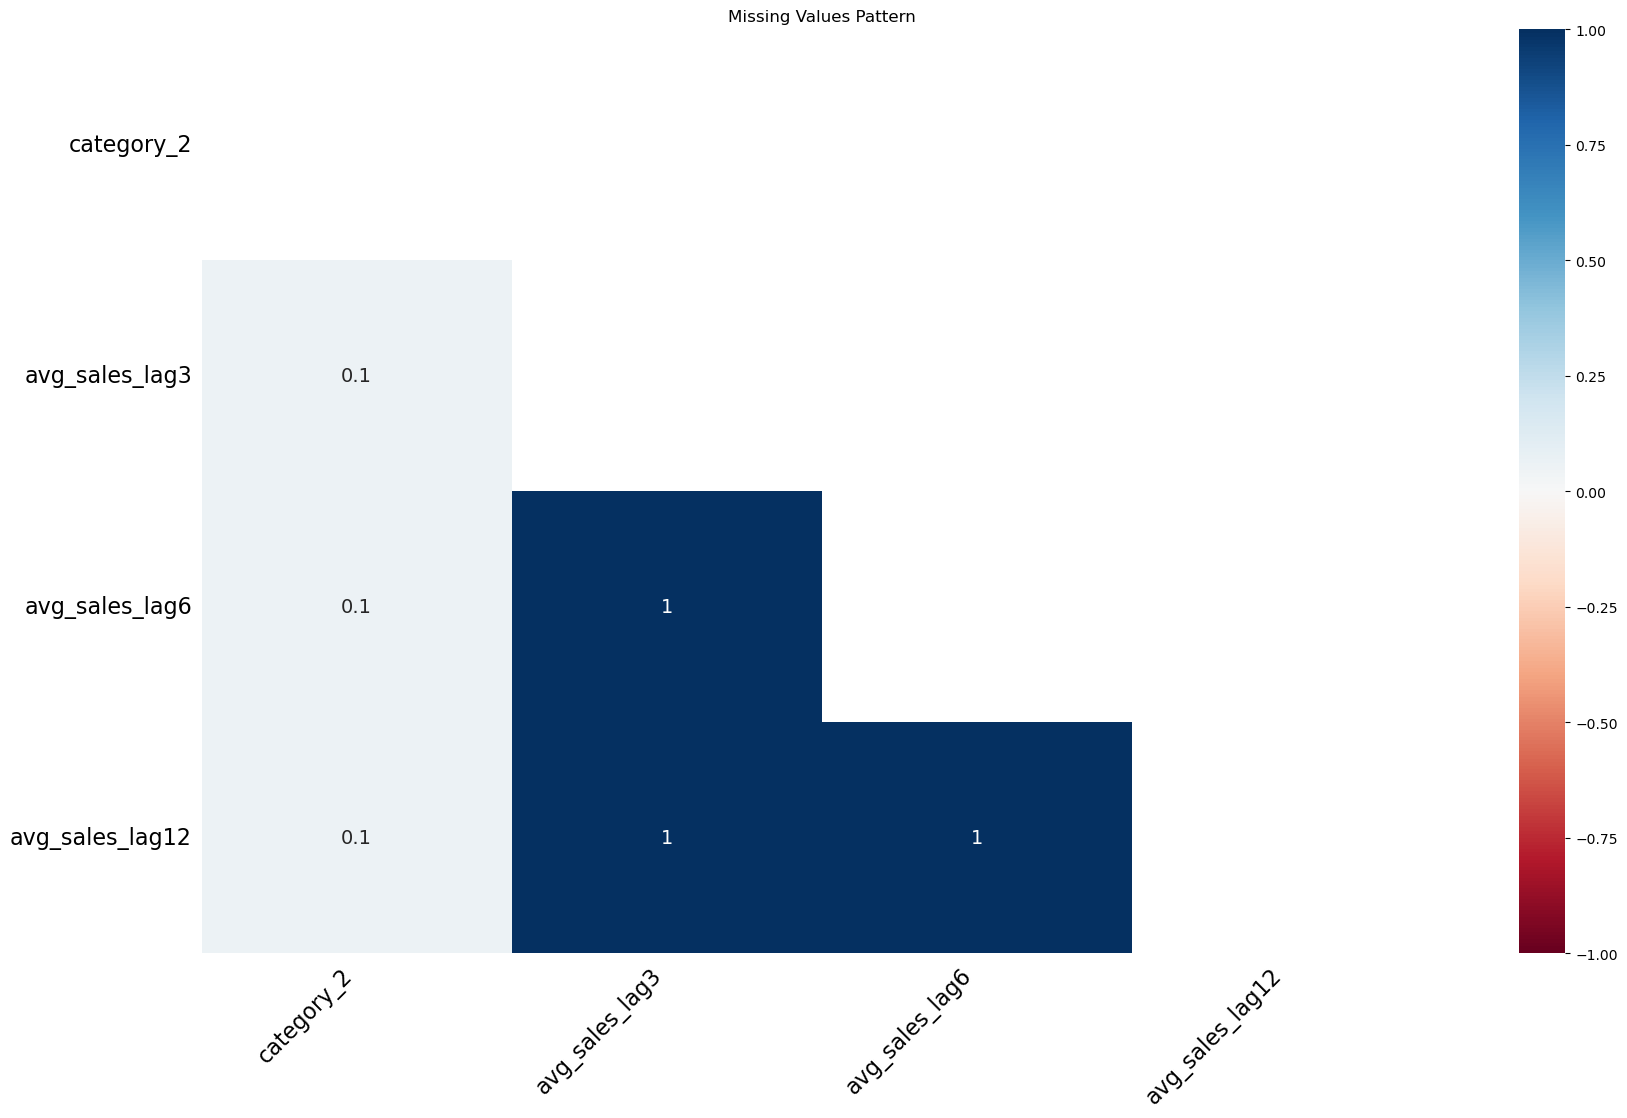

In [ ]:
# Visualize missing values pattern using a heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title('Missing Values Pattern')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values Dendrogram')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Distance')

<Figure size 1200x600 with 0 Axes>

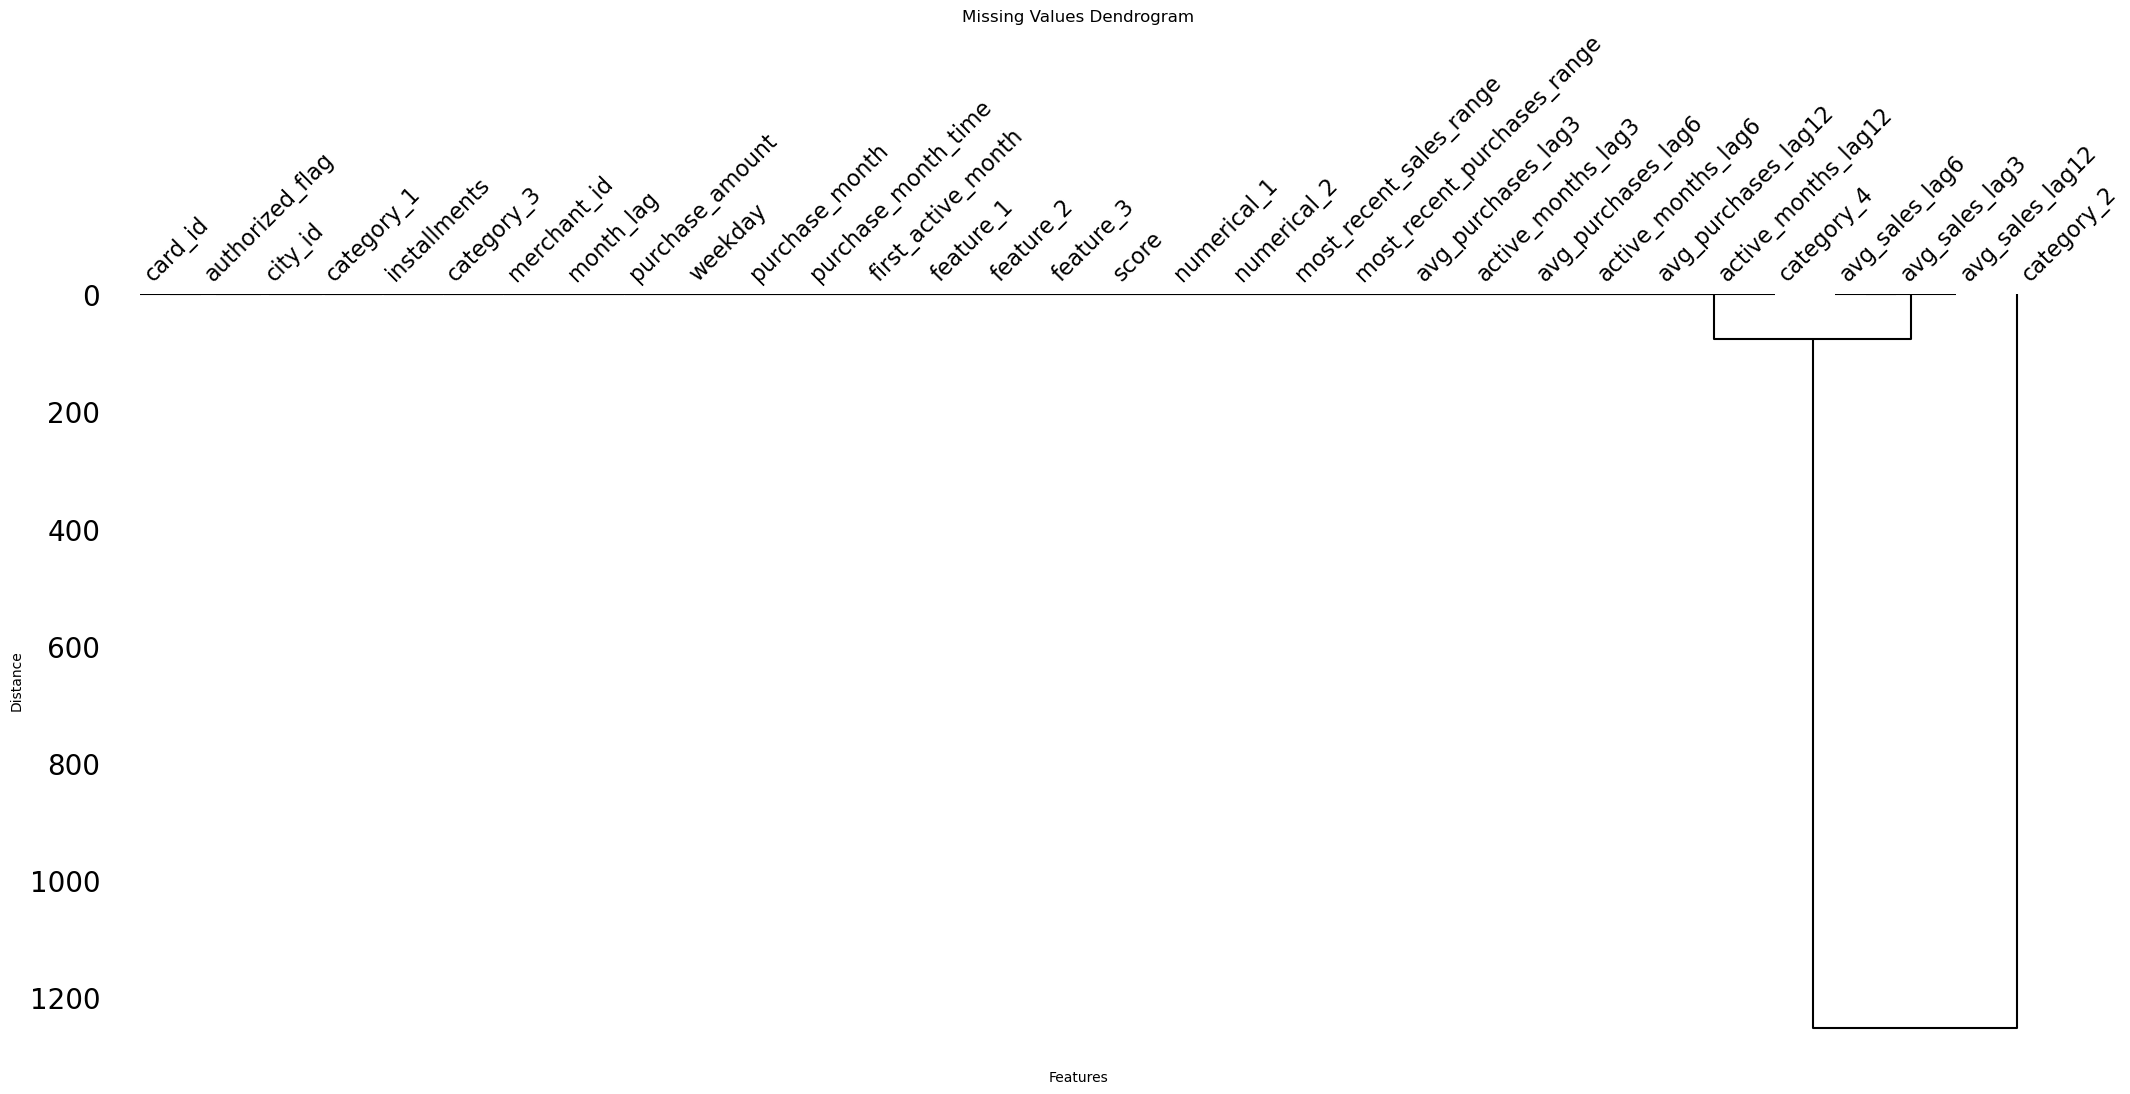

In [ ]:
# Visualize missing values pattern using a dendrogram
plt.figure(figsize=(12, 6))
msno.dendrogram(df)
plt.title('Missing Values Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

 **From all this visualization we can assume that:**
 
1- the missings in category_2 are at random  (MCAR) 


2- the missings in 'avg_sales_lag3','avg_sales_lag6','avg_sales_lag12' are at random  (MAR)

3- pattern is general

In [ ]:
df.shape

(13928443, 32)

In [ ]:
print("Features with missing values:\n\n")
for feature, count in missing_values_count.items():
    if count > 0:
        missing_percentage = (count / len(df)) * 100
        print(f"{feature}: {count} , Missing percentage: {missing_percentage:.2f}%")

Features with missing values:


category_2: 1568172 , Missing percentage: 11.26%
avg_sales_lag3: 5828 , Missing percentage: 0.04%
avg_sales_lag6: 5828 , Missing percentage: 0.04%
avg_sales_lag12: 5828 , Missing percentage: 0.04%


**Observation:**
As we see the missings persentage is very low in most of the columns with missing so we can drop them

### **Data Cleaning**

In [ ]:
df.shape

(13928443, 32)

In [ ]:
df1=df.dropna()
df2=df1
df1

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_id,month_lag,purchase_amount,category_2,weekday,purchase_month,purchase_month_time,first_active_month,feature_1,feature_2,feature_3,score,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_5037ff576e,278,N,1,B,M_ID_d70b0fd11b,-6,-0.627477,5.0,2,June,Early,Jan-17,5,1,1,-2.352713,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
1,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-6,-0.547611,5.0,2,August,End,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
2,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-5,-0.186434,5.0,1,September,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
3,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-9,1.354204,5.0,4,May,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
4,Y,C_ID_7a15b6bfe1,278,N,1,B,M_ID_d70b0fd11b,-3,-0.666561,5.0,3,November,Early,Apr-17,1,1,0,0.483757,-0.027726,-0.057471,B,B,0.98,1.006526,3,0.99,1.020108,6,0.97,1.021370,12,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13928438,Y,C_ID_e9aff9026a,212,N,3,C,M_ID_02008f16cc,-4,-0.221130,4.0,0,April,Mid,Jun-16,5,1,1,1.658092,-0.057471,-0.057471,E,E,0.83,0.937500,3,0.79,1.000000,6,0.93,1.244792,12,Y
13928439,Y,C_ID_21cb0e201b,56,N,12,C,M_ID_ee9dce4ab1,-5,1.776044,5.0,4,September,Early,Sep-17,2,3,0,-0.096781,-0.057471,-0.057471,D,E,0.80,0.995781,3,0.48,0.626582,6,0.26,0.327004,12,N
13928440,Y,C_ID_fc220cb7ec,41,N,2,C,M_ID_3c075a6358,-2,0.087064,5.0,1,December,Mid,Aug-17,2,3,0,2.808926,-0.057471,-0.057471,D,E,0.75,1.000000,3,0.44,0.783333,6,0.31,0.658333,12,N
13928441,Y,C_ID_18cf2da215,274,N,0,A,M_ID_8b3366a9de,1,-0.338187,1.0,0,April,Mid,Sep-16,3,2,1,-2.647789,-0.057471,-0.057471,E,E,0.88,1.090909,3,0.88,1.030303,6,1.01,1.166667,12,N


In [ ]:
df1.shape

(12360246, 32)

## **Cheching outliers**

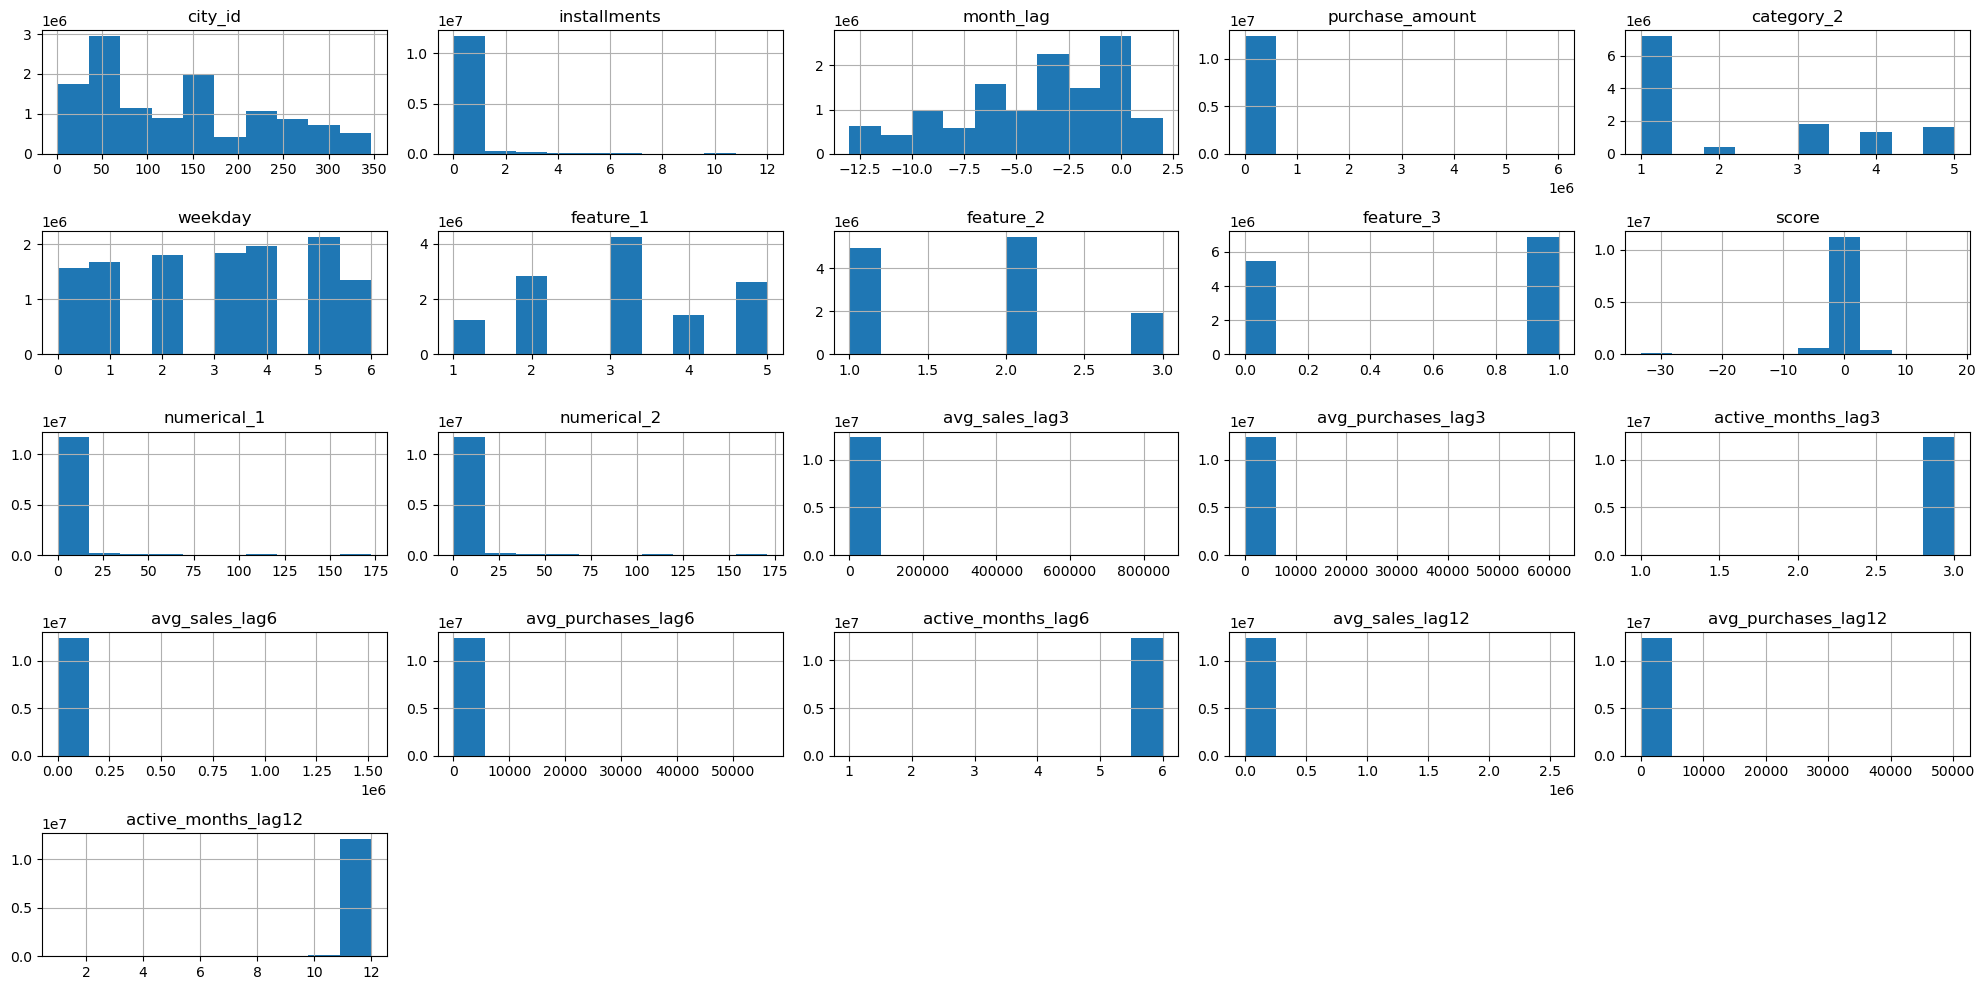

In [ ]:
# Visualize distribution of each feature
df1.hist(figsize=(20,10))
plt.tight_layout();

**Observation**:
**The outliers in this data is important and dropping it is not a good idea that the model will be less generalized for all the inputs**

# **Checking Multicolinearity**

<Figure size 2500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

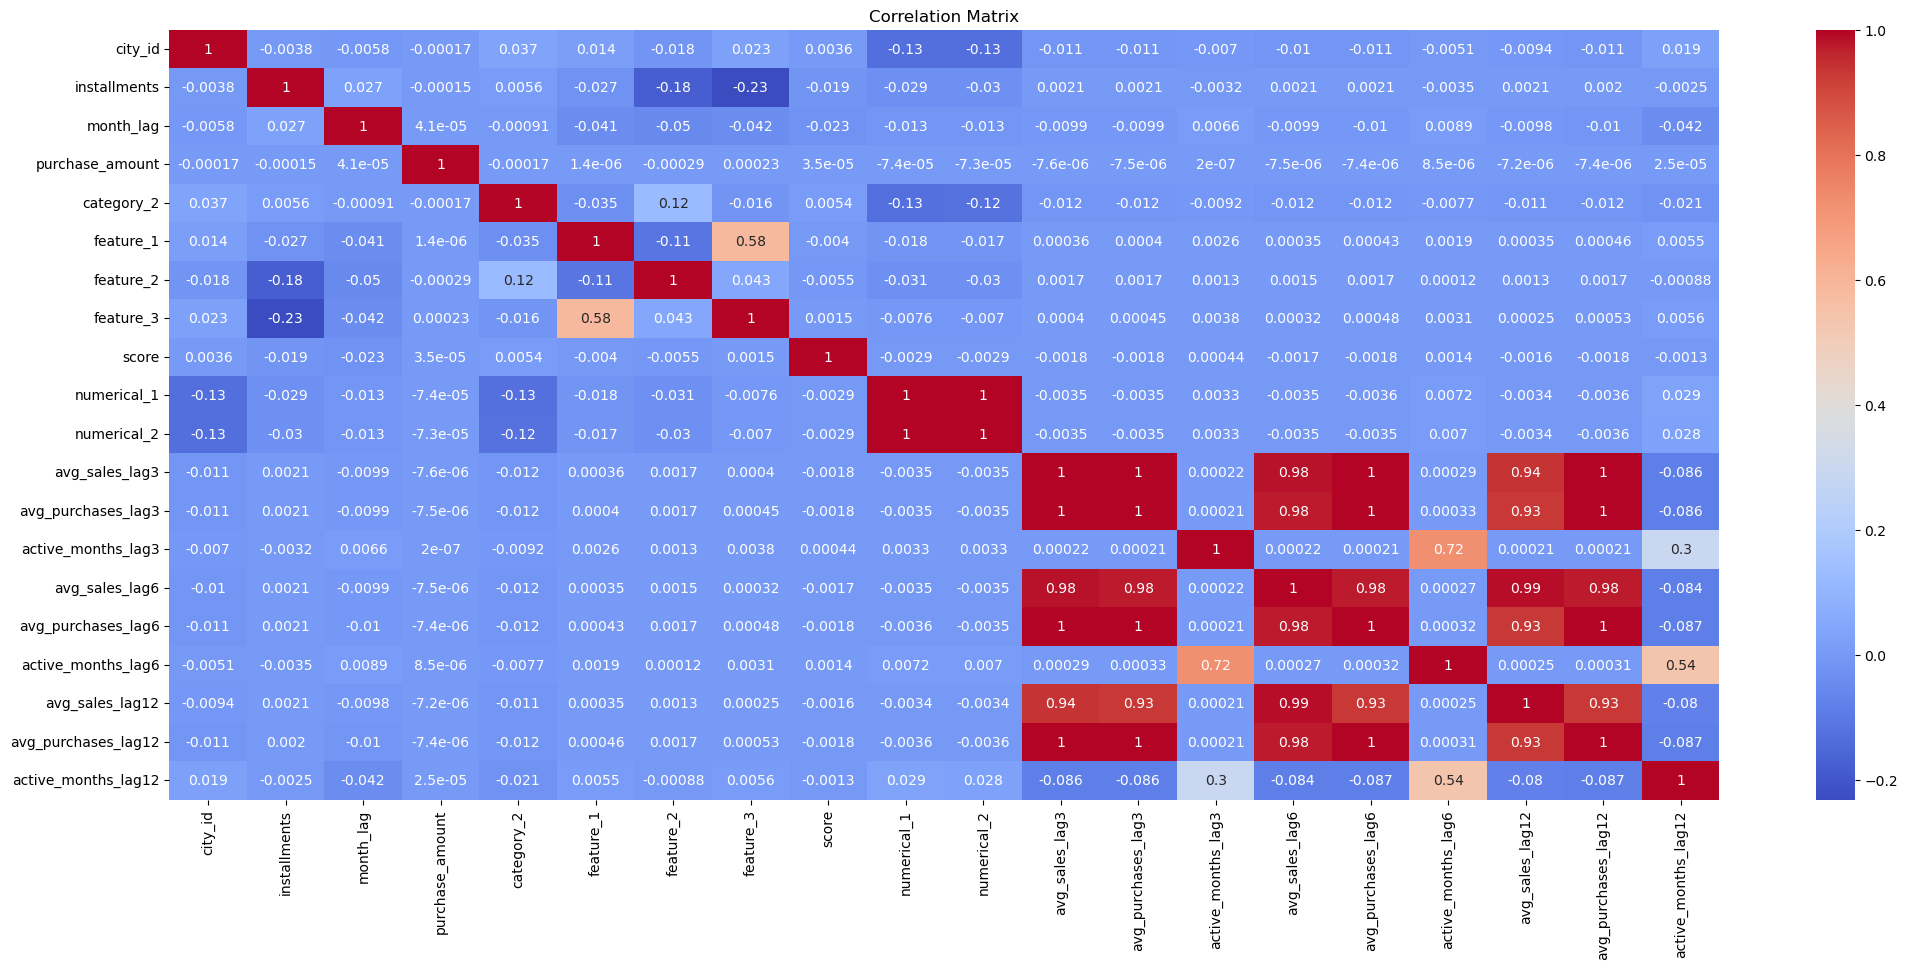

In [ ]:
# Select only numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **From this heatmap we observed :**
1- the highly correlated features to each other (Multicolinearity)

2- the highly correlated features to the Score (Target)

**From this oservation we can drop some columns that have high multicolinearity between each other**

In [ ]:
df1.drop('avg_purchases_lag3', axis=1, inplace=True)
df1.drop('avg_purchases_lag12', axis=1, inplace=True)
df1.drop('avg_purchases_lag6', axis=1, inplace=True)
df1.drop('numerical_2', axis=1, inplace=True)


# **Statistics and Hypothesis Test**




### **including Q4,Q5**

## **Statistics**

<Axes: xlabel='score', ylabel='Density'>

Text(0.5, 1.0, 'Target variable distribution')

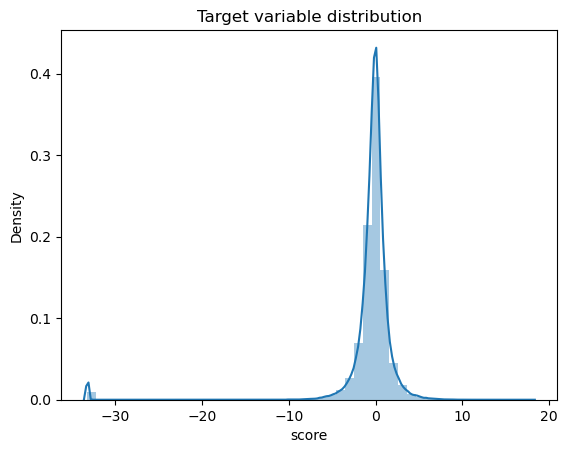

In [ ]:
sns.distplot(df['score'])
plt.title('Target variable distribution')
plt.show()

(-3.0, 3.0)

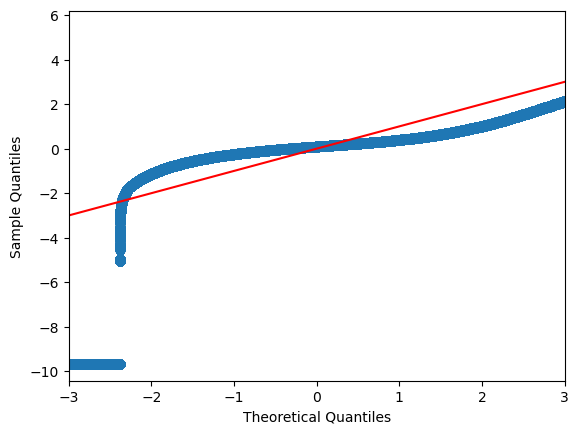

In [ ]:
#1) Graphical test

# Create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df1['score'], line='45', fit=True)
plt.xlim(-3, 3)  # Set limits for x-axis values
plt.show()


In [ ]:
# 2) statistical test

# Shapiro-wilk test
w, pvalue = stats.shapiro(df1['score']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test, ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = stats.normaltest(df1['score'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
p = 0
The null hypothesis can be rejected


### Observation:
According to the graphical and statistical tests the distribution of the target column is not from normal distribution that woll hep uis when selecting the regression model that we can't use linear regression because it's assuming that the data is normaly distributed.

## **Hypothesis Test**

### 1- Is there a significant difference in the loyalty scores between customers in category 'A' and category 'B' in the variable 'category_3'?

Null Hypothesis (H0): There is no significant difference between the scores of category 'A' and category 'B' in the 'category_3' variable.

Alternative Hypothesis (H1): There is a significant difference between the scores of category 'A' and category 'B' in the 'category_3' variable.


In [ ]:
from scipy.stats import ttest_ind
# Extract the relevant columns
date_category = df1['category_3']
target = df1['score']

# Perform the t-test
group1 = target[date_category == 'A']
group2 = target[date_category == 'B']

statistic, p_value = ttest_ind(group1, group2, equal_var=False)
# Set significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between the scores of category 'A' and category 'B' in the 'category_3' variable.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between the scores of category 'A' and category 'B' in the 'category_3' variable.")

    

Reject the null hypothesis
There is a significant difference between the scores of category 'A' and category 'B' in the 'category_3' variable.


### **2- Does the average loyalty score significantly differ between the users that perchse in months of February and January compared to other months**?

Null Hypothesis (H0): There is no significant difference in the average loyalty score between February and January compared to other months.

Alternative Hypothesis (H1): There is a significant difference in the average loyalty score between February and January compared to other months.

In [ ]:
# Extract the relevant columns
loyalty_score = df1['score']
month = df1['purchase_month']

# Hypothesis 2: Highest number of purchases in February and January
febjan_scores = loyalty_score[(month == 'February') | (month == 'January')]
other_months_scores = loyalty_score[(month != 'February') & (month != 'January')]

# Perform the t-test
statistic, p_value = ttest_ind(febjan_scores, other_months_scores, alternative='greater')

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the average loyalty score in February and January compared to other months.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the average loyalty score in February and January compared to other months.")


Reject the null hypothesis
There is a significant difference in the average loyalty score in February and January compared to other months.


## Observation: 
    1-there is  a significant difference in the loyalty scores between customers in category 'A' and category 'B' in the variable 'category_3' so we have to select this column in training
    2-the average loyalty score significantly differs between the users that perchse in months of February and January compared to other months

# **Encoding categorical_data**

In [ ]:
# check categrical data
categorical_data = df1.select_dtypes(include='object')
categorical_data

,authorized_flag,card_id,category_1,category_3,merchant_id,purchase_month,purchase_month_time,first_active_month,most_recent_sales_range,most_recent_purchases_range,category_4
0,Y,C_ID_5037ff576e,N,B,M_ID_d70b0fd11b,June,Early,Jan-17,B,B,N
1,Y,C_ID_7a15b6bfe1,N,B,M_ID_d70b0fd11b,August,End,Apr-17,B,B,N
2,Y,C_ID_7a15b6bfe1,N,B,M_ID_d70b0fd11b,September,Early,Apr-17,B,B,N
3,Y,C_ID_7a15b6bfe1,N,B,M_ID_d70b0fd11b,May,Early,Apr-17,B,B,N
4,Y,C_ID_7a15b6bfe1,N,B,M_ID_d70b0fd11b,November,Early,Apr-17,B,B,N
...,...,...,...,...,...,...,...,...,...,...,...
13928438,Y,C_ID_e9aff9026a,N,C,M_ID_02008f16cc,April,Mid,Jun-16,E,E,Y
13928439,Y,C_ID_21cb0e201b,N,C,M_ID_ee9dce4ab1,September,Early,Sep-17,D,E,N
13928440,Y,C_ID_fc220cb7ec,N,C,M_ID_3c075a6358,December,Mid,Aug-17,D,E,N
13928441,Y,C_ID_18cf2da215,N,A,M_ID_8b3366a9de,April,Mid,Sep-16,E,E,N


In [ ]:
# Encoding category_1,category_4,authorized_flag with mapping
df1['category_1'] = df1['category_1'].map({
    'Y': 1,
    'N': 0
})

df1['category_4'] = df1['category_4'].map({
    'Y': 1,
    'N': 0
})
df1['authorized_flag'] = df1['authorized_flag'].map({
    'Y': 1,
    'N': 0
})
    

In [ ]:
df1['category_3'].unique()
df1['most_recent_purchases_range'].unique()
df1['purchase_month'].unique()

array(['B', 'A', 'C'], dtype=object)

array(['B', 'C', 'E', 'D', 'A'], dtype=object)

array(['June', 'August', 'September', 'May', 'November', 'July',
       'January', 'October', 'December', 'February', 'April', 'March'],
      dtype=object)

## **According to the describtuon A>B>C>D>E**
so we have to map it rather than one-hot encoding becouse it's ordinal data

In [ ]:
# Encoding category_3,most_recent_purchases_range,most_recent_sales_range with mapping
df1['category_3'] = df1['category_3'].map({
    'A': 3,
    'B': 2,
    'C': 1
    
})
df1['most_recent_purchases_range'] = df1['most_recent_purchases_range'].map({
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1
})
df1['most_recent_sales_range'] = df1['most_recent_sales_range'].map({
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1
})
# Perform one-hot encoding on the 'purchase_month' column because i dont care about the order in this case
df1 = pd.get_dummies(df1, columns=['purchase_month'])

In [ ]:
categorical_data = df1.select_dtypes(include='object')
categorical_data

,card_id,merchant_id,purchase_month_time,first_active_month
0,C_ID_5037ff576e,M_ID_d70b0fd11b,Early,Jan-17
1,C_ID_7a15b6bfe1,M_ID_d70b0fd11b,End,Apr-17
2,C_ID_7a15b6bfe1,M_ID_d70b0fd11b,Early,Apr-17
3,C_ID_7a15b6bfe1,M_ID_d70b0fd11b,Early,Apr-17
4,C_ID_7a15b6bfe1,M_ID_d70b0fd11b,Early,Apr-17
...,...,...,...,...
13928438,C_ID_e9aff9026a,M_ID_02008f16cc,Mid,Jun-16
13928439,C_ID_21cb0e201b,M_ID_ee9dce4ab1,Early,Sep-17
13928440,C_ID_fc220cb7ec,M_ID_3c075a6358,Mid,Aug-17
13928441,C_ID_18cf2da215,M_ID_8b3366a9de,Mid,Sep-16


# **Regression Analysis**



 I checked the Multicolinearity in the heat map and used it in selecting the best columns

## **Feature Selection**
those features selected depending on:

1- the correlation matrix in the previous part that we take the columns highly correlated to the target and low correlated to each other .

2- the hypotheses testing

In [ ]:
df1.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_id', 'month_lag', 'purchase_amount',
       'category_2', 'weekday', 'purchase_month_time', 'first_active_month',
       'feature_1', 'feature_2', 'feature_3', 'score', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'avg_sales_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'active_months_lag12',
       'category_4', 'purchase_month_April', 'purchase_month_August',
       'purchase_month_December', 'purchase_month_February',
       'purchase_month_January', 'purchase_month_July', 'purchase_month_June',
       'purchase_month_March', 'purchase_month_May', 'purchase_month_November',
       'purchase_month_October', 'purchase_month_September'],
      dtype='object')

In [ ]:
data= df1[['authorized_flag','category_1', 'installments',
       'category_3','month_lag', 
       'category_2','feature_1', 'feature_2', 'feature_3', 'score',
       'numerical_1', 'most_recent_purchases_range', 'purchase_month_April',
       'purchase_month_August', 'purchase_month_December',
       'purchase_month_February', 'purchase_month_January',
       'purchase_month_July', 'purchase_month_June', 'purchase_month_March',
       'purchase_month_May', 'purchase_month_November',
       'purchase_month_October', 'purchase_month_September','avg_sales_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'active_months_lag12', 'category_4','most_recent_sales_range']]
data.to_csv('final.csv', index=False)


## **Check for duplicates after selecting features(data cleaning)**

In [ ]:
# Check for duplicates
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 3420672


In [ ]:
# Drop duplicates
data = data.drop_duplicates()

## **Building a regression model**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('score', axis=1), data['score'], test_size=0.2, random_state=42)

# Define the LightGBM regression model
model = lgb.LGBMRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


LGBMRegressor()

##**report the performance of your model on train and test**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the train set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE on train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate MSE on train and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


print('MSE - Train Set: {:.4f}'.format(train_mse))
print('MSE - Test Set: {:.4f}'.format(test_mse))
print('RMSE - Train Set: {:.4f}'.format(train_rmse))
print('RMSE - Test Set: {:.4f}'.format(test_rmse))

MSE - Train Set: 11.0041
MSE - Test Set: 11.1743
RMSE - Train Set: 3.3172
RMSE - Test Set: 3.3428


Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Actual vs Predicted Scores - Train Set')

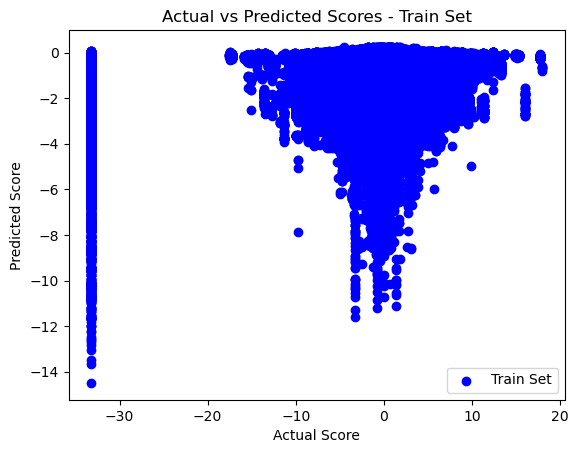

Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Actual vs Predicted Scores - Test Set')

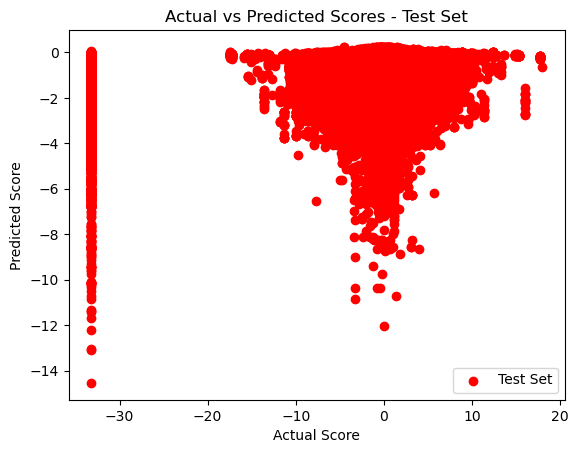

In [ ]:
# Scatter plot for train set
plt.scatter(y_train, y_train_pred, color='blue', label='Train Set')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores - Train Set')
plt.legend()
plt.show()

# Scatter plot for test set
plt.scatter(y_test, y_test_pred, color='red', label='Test Set')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores - Test Set')
plt.legend()
plt.show()

Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Actual vs Predicted Scores')

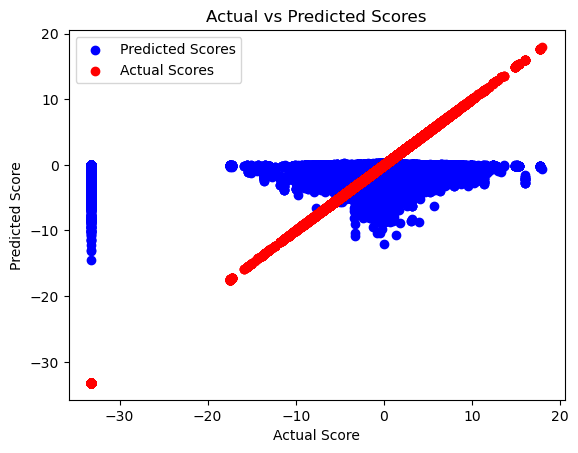

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted Scores')
plt.scatter(y_test, y_test, color='red', label='Actual Scores')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.show()


(array([1.213000e+04, 3.246000e+03, 1.520000e+02, 5.400000e+01,
        8.000000e+00, 3.000000e+00, 9.100000e+01, 9.700000e+01,
        8.900000e+01, 1.651000e+03, 1.144400e+04, 8.014000e+04,
        1.016441e+06, 5.964620e+05, 5.677200e+04, 7.848000e+03,
        1.062000e+03, 1.280000e+02, 6.200000e+01, 3.500000e+01]),
 array([-33.26638082, -30.66514185, -28.06390288, -25.46266391,
        -22.86142495, -20.26018598, -17.65894701, -15.05770804,
        -12.45646907,  -9.8552301 ,  -7.25399114,  -4.65275217,
         -2.0515132 ,   0.54972577,   3.15096474,   5.7522037 ,
          8.35344267,  10.95468164,  13.55592061,  16.15715958,
         18.75839854]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Residual')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Residuals (LGBM)')

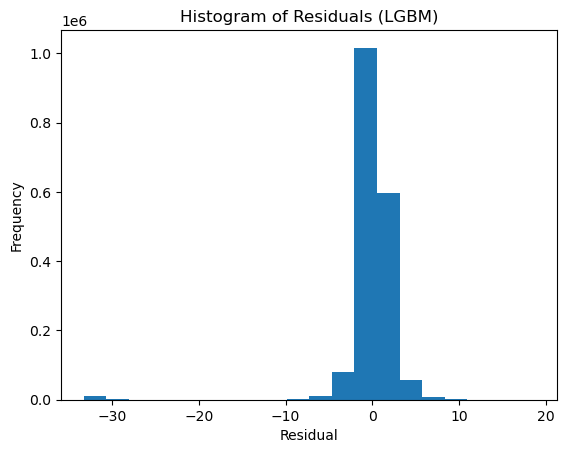

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (LGBM)')
